# FAA 1462 Pareja 10. Práctica 3 REGRESIÓN LOGÍSTICA Y ANÁLISIS ROC
## Kevin de la Coba Malam

En este documento se mostrarán los resultados del clasificador **Regresión Logística** usando diferentes *épocas* y *constantes de aprendizaje*. Posteriormente, se hará un **analísis ROC** de todos los clasificadores implementados. En este análisis se mostrarán **puntos sobre el espacio ROC** y una **curva ROC**.

En está practica, se han usado ambos tipos de validaciones, cruzada y simple. En concreto, con la validación cruzada se usan los valores K: **4, 6, 8, 10**. Para la validación simple se usán valores para el %: **25, 20, 15, 10**.

## Modificaciones
- Corrección en el clasificador K-NN. En el método *clasificar* siempre se normalizaban los datos, ahora solo se hace cuando el objeto tiene el atributo norm a true.


In [1]:
# Para esconder los warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from Datos import Datos
import utils
import MatrizConfusion as MC
import matplotlib.pyplot as plt

# Cargamos datos
pima = Datos("ConjuntosDatos/pima-indians-diabetes__a.data")
wdbc = Datos("ConjuntosDatos/wdbc__a.data")

## 1. Resultados Regresión Logística (Implementación propia)
A continuación se mostraran tablas en las cuales se realizan tests sobre los conjuntos de datos *pima* y *wdbc*. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

In [2]:
errorMedioPimaVC, errorMedioPimaVS, errorMedioWDBCVC, errorMedioWDBCVS = utils.RL_test(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.435185		0.562500
Validación Cruzada K-Folds=4			0.425926		0.437500
Validación Simple 20%				0.419048		0.533333
Validación Cruzada K-Folds=6			0.472222		0.722222
Validación Simple 15%				0.385417		0.500000
Validación Cruzada K-Folds=8			0.432692		0.500000
Validación Simple 10%				0.420000		0.500000
Validación Cruzada K-Folds=10			0.370000		0.500000
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.379630		0.562500
Validación Cruzada K-Folds=4			0.518519		0.500000
Validación Simple 20%				0.390476		0.666667
Validación Cruzada K-Folds=6			0.416667		0.555556
Validación Simple 15%				0.427083		0.750000
Validación Cruzada K-Folds=8			0.548077		0.687500
Validación Simple 10%				0.420000		0.600000
Validación Cruzada K-Folds=10			0.430000		0.400000
Test Épocas=10 Constante ap

Validación Simple 20%				0.495238		0.266667
Validación Cruzada K-Folds=6			0.407407		0.500000
Validación Simple 15%				0.468750		0.500000
Validación Cruzada K-Folds=8			0.384615		0.750000
Validación Simple 10%				0.440000		0.100000
Validación Cruzada K-Folds=10			0.460000		0.500000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.388889		0.562500
Validación Cruzada K-Folds=4			0.509259		0.375000
Validación Simple 20%				0.380952		0.466667
Validación Cruzada K-Folds=6			0.379630		0.611111
Validación Simple 15%				0.416667		0.666667
Validación Cruzada K-Folds=8			0.451923		0.562500
Validación Simple 10%				0.310000		0.700000
Validación Cruzada K-Folds=10			0.370000		0.500000
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.370370		0.562500
Validación Cruzada K-Folds=4			0.462963		0.562500
Validación Simple 20%				0.

### 1.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=0.5

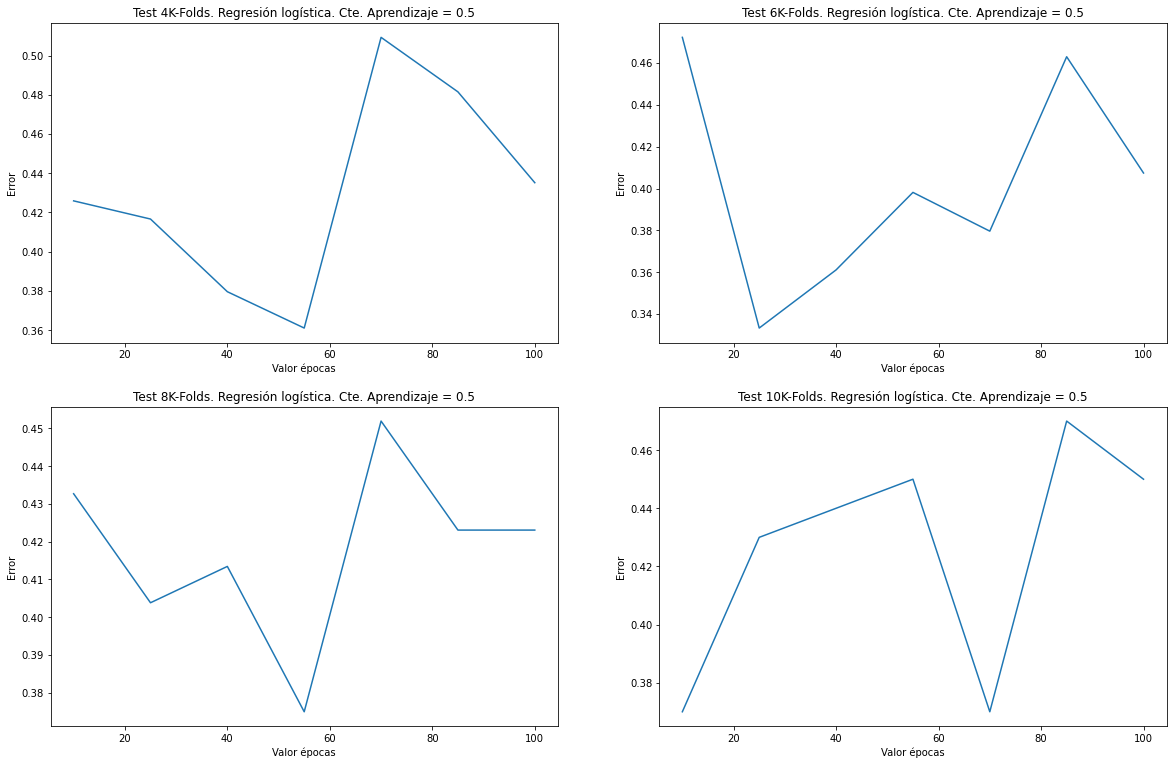

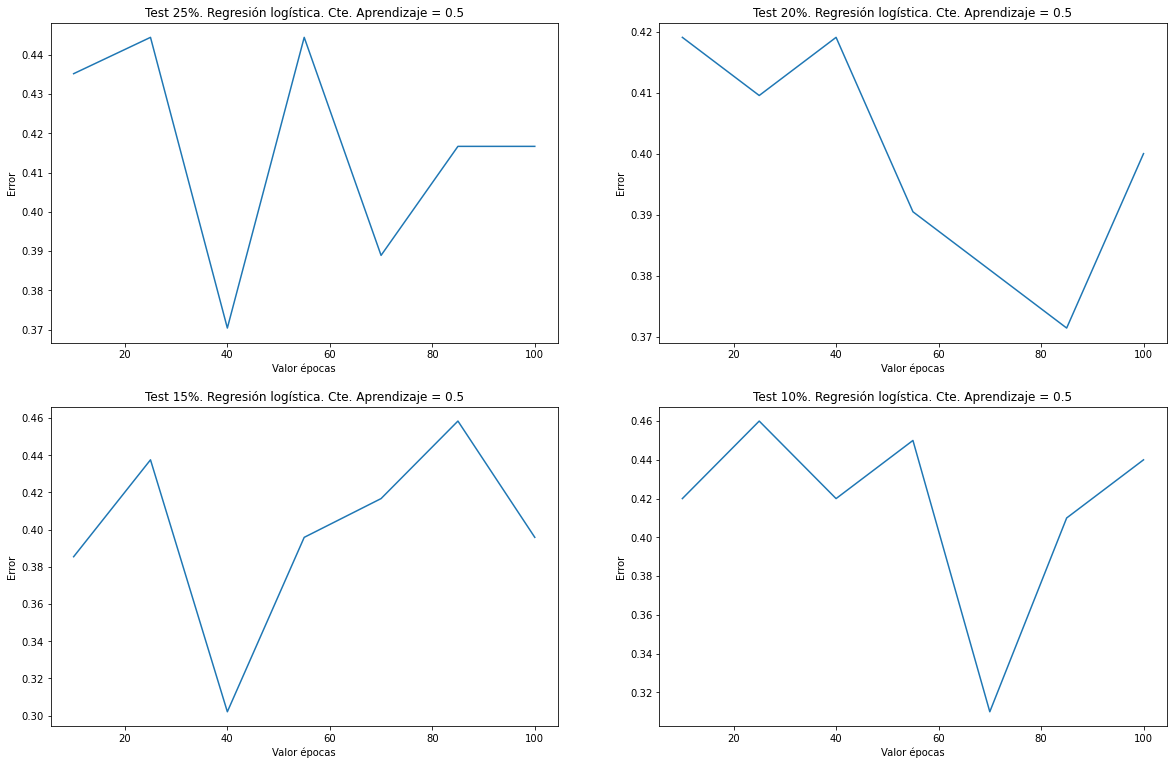

In [3]:
utils.plot_epoch(errorMedioPimaVC, 0.5, False)
utils.plot_epoch(errorMedioPimaVS, 0.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.0

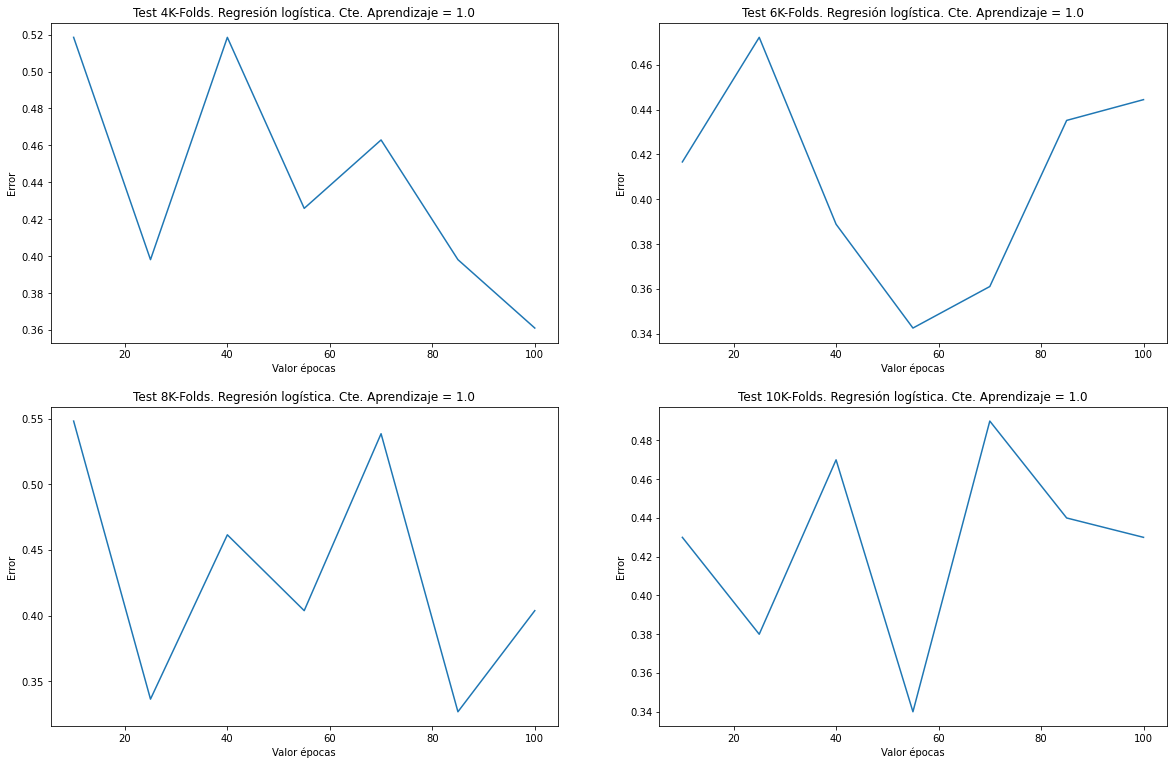

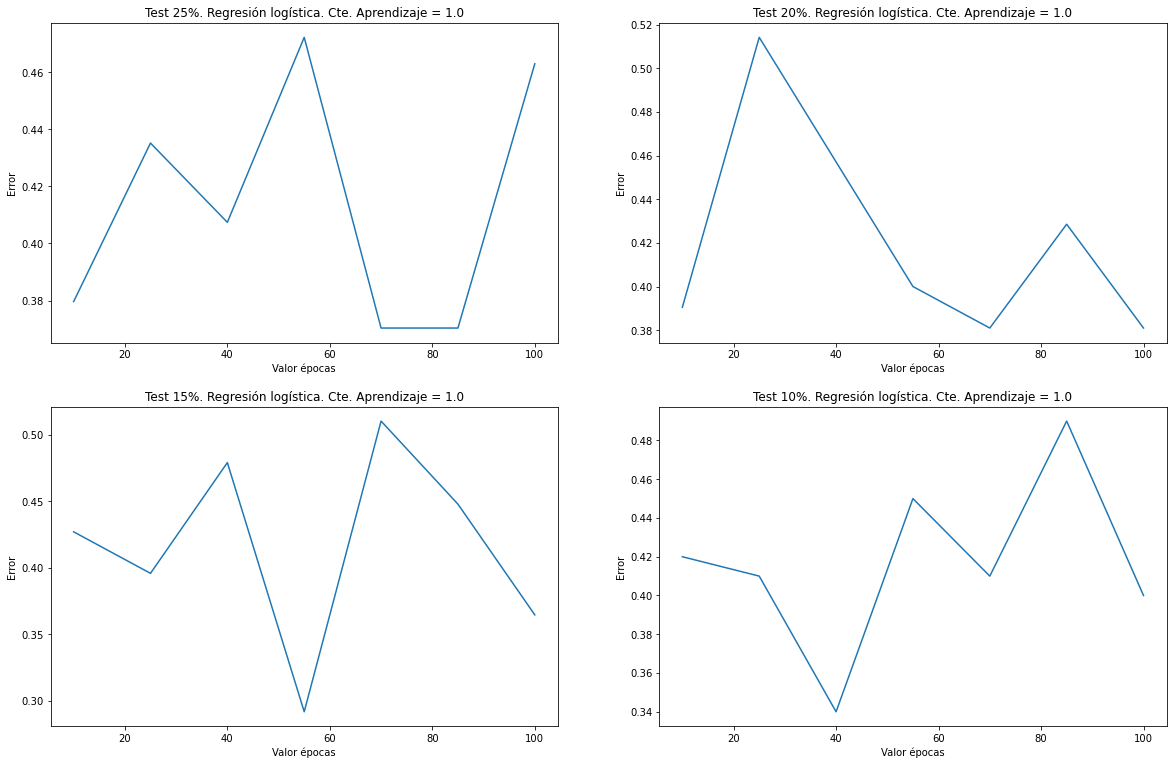

In [4]:
utils.plot_epoch(errorMedioPimaVC, 1.0, False)
utils.plot_epoch(errorMedioPimaVS, 1.0, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.5

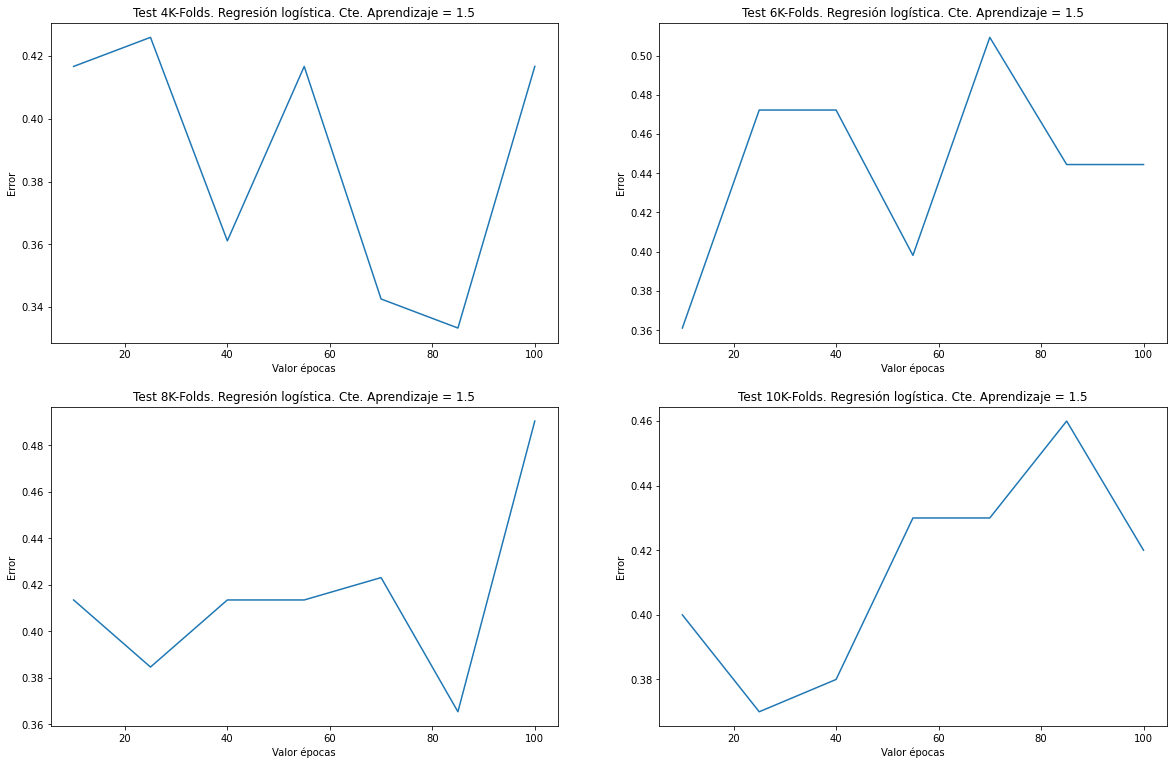

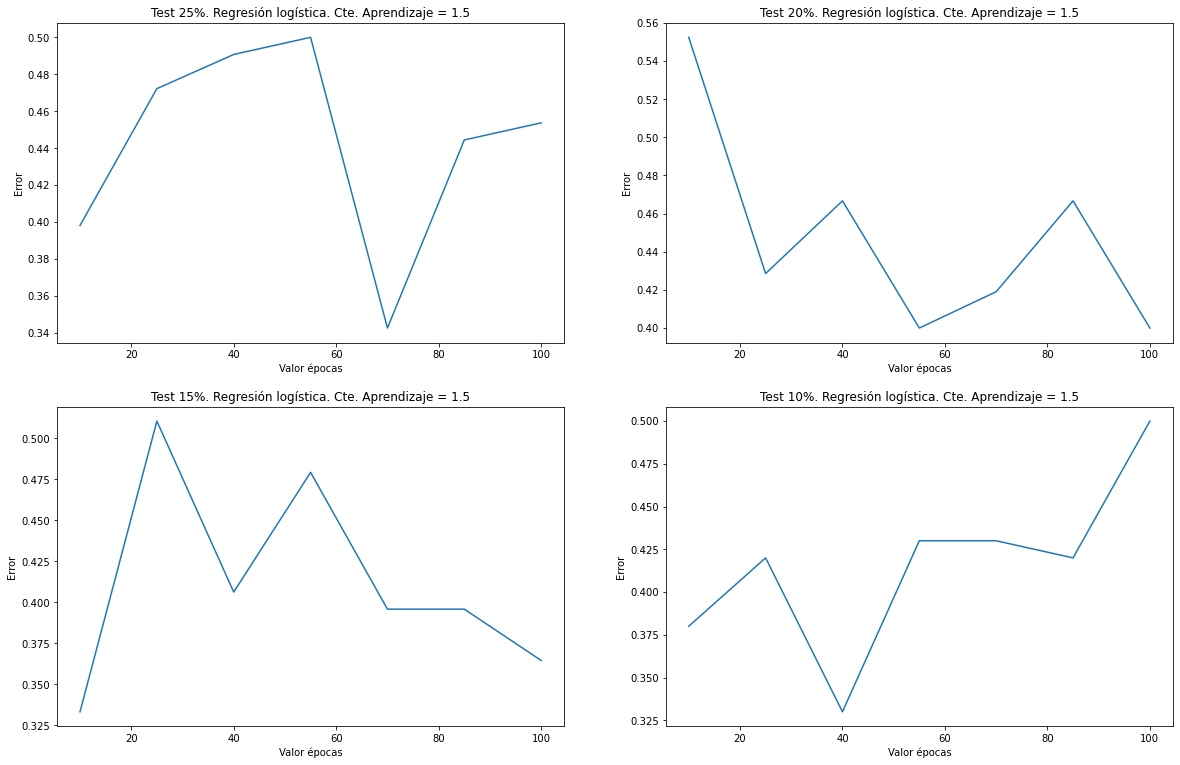

In [5]:
utils.plot_epoch(errorMedioPimaVC, 1.5, False)
utils.plot_epoch(errorMedioPimaVS, 1.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=2.0

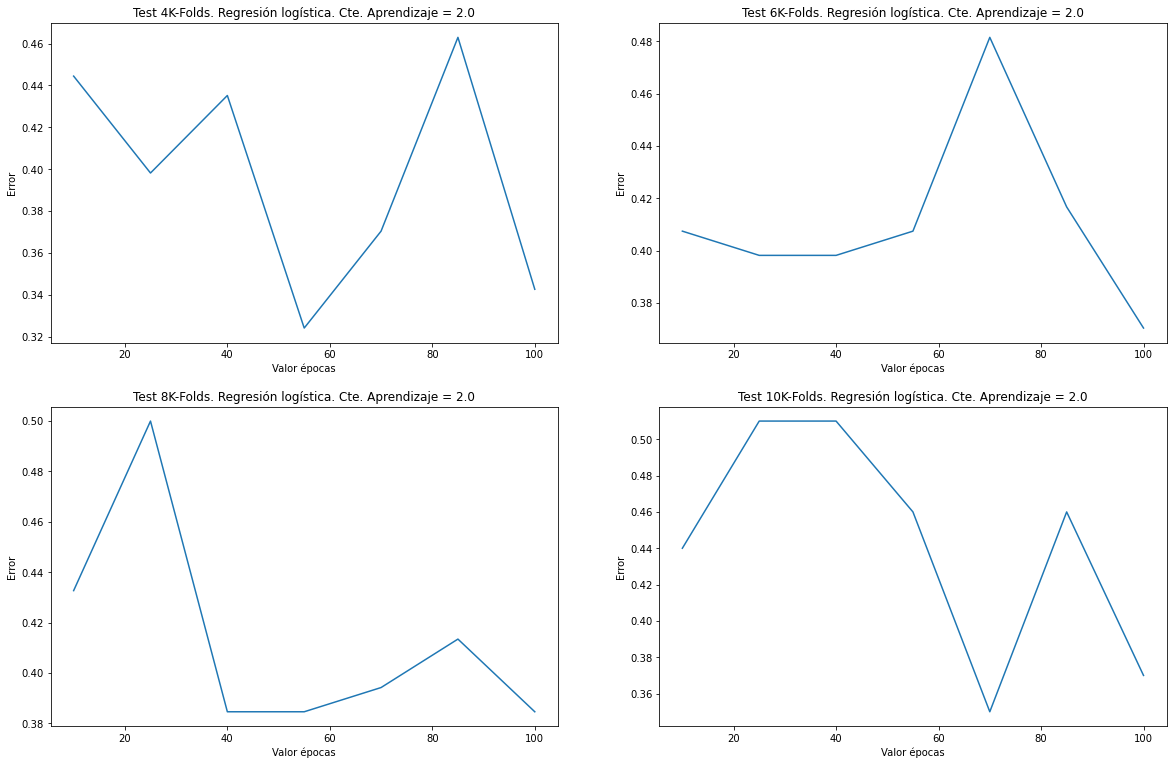

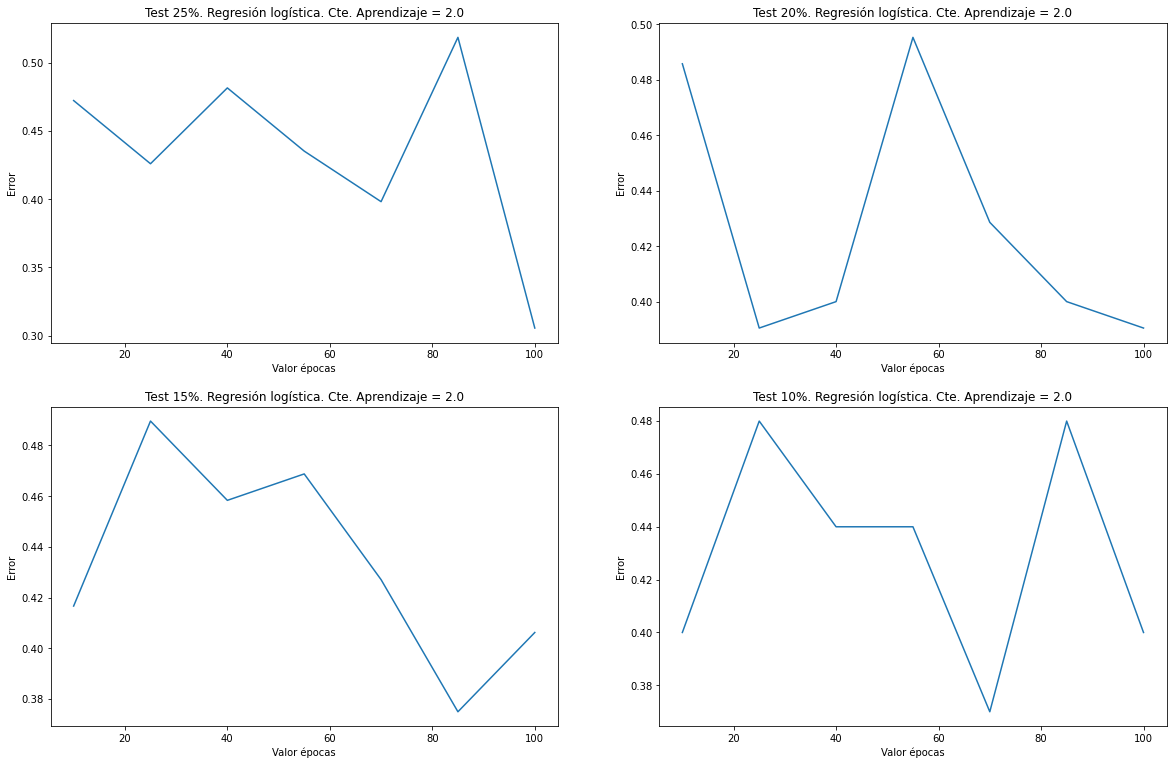

In [6]:
utils.plot_epoch(errorMedioPimaVC, 2.0, False)
utils.plot_epoch(errorMedioPimaVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN PIMA
#### 1.1.2 *WDBC* Cte. aprendizaje=0.5

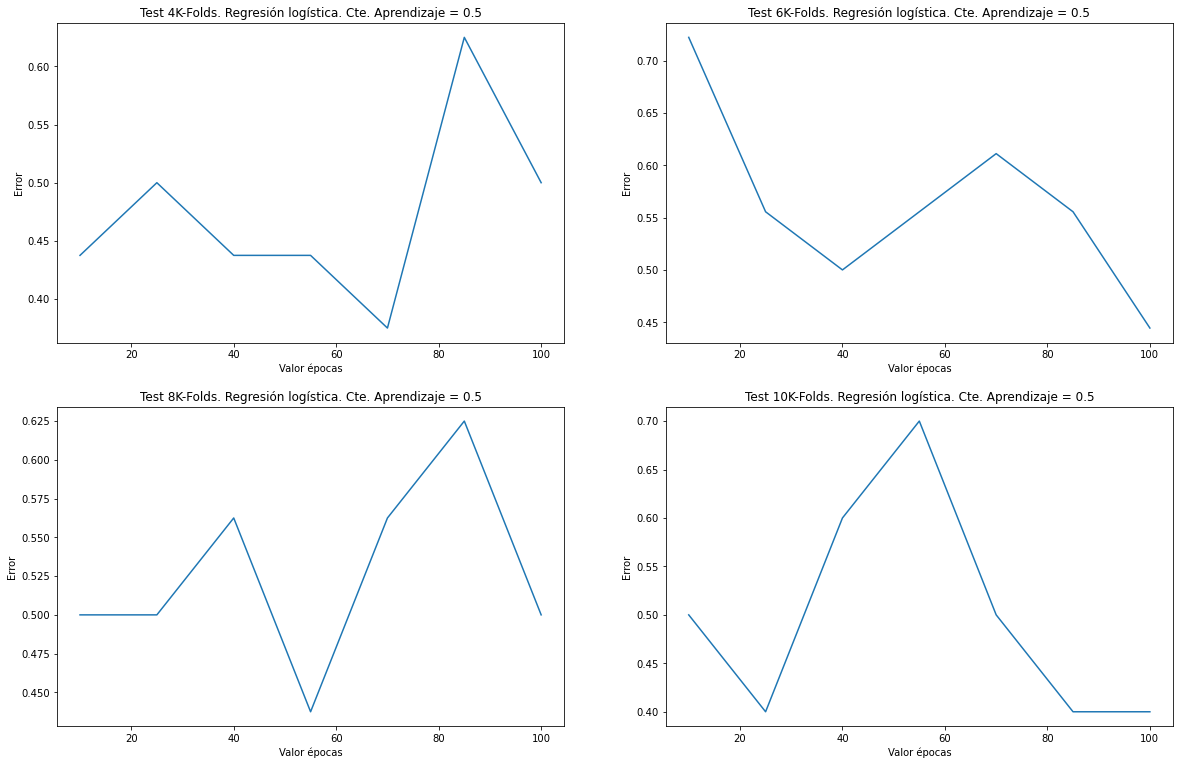

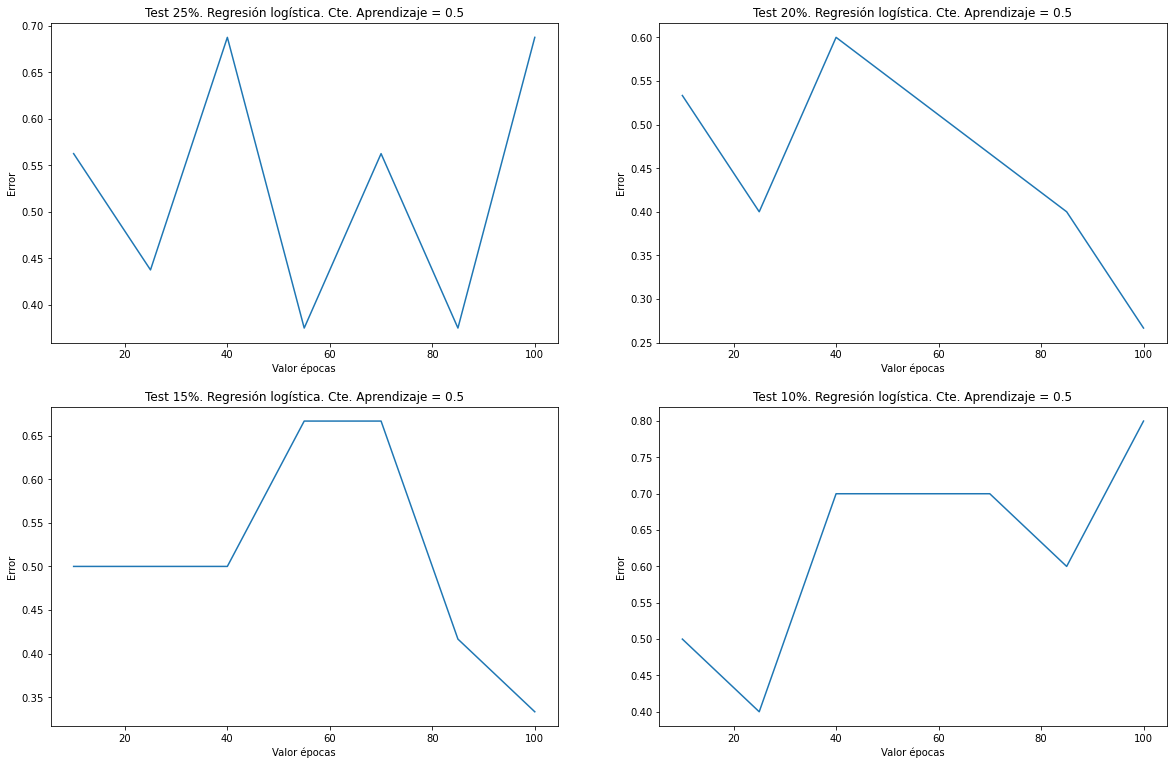

In [7]:
utils.plot_epoch(errorMedioWDBCVC, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS, 0.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.0

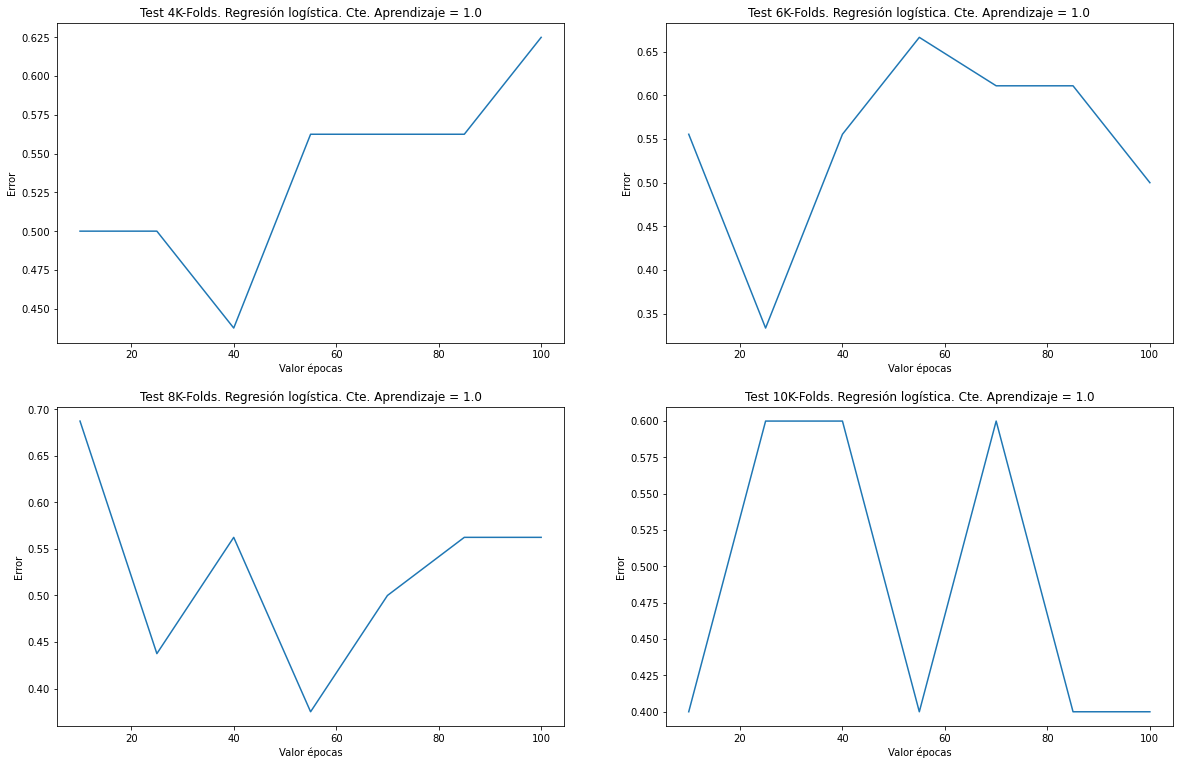

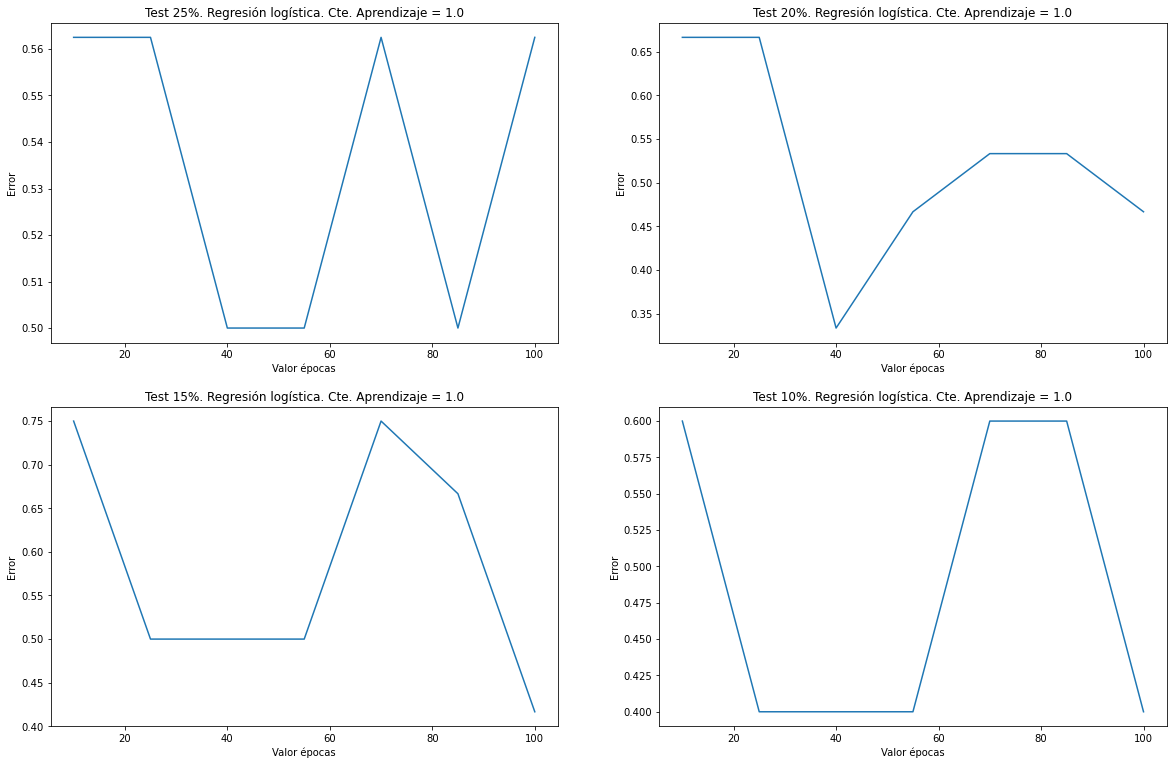

In [8]:
utils.plot_epoch(errorMedioWDBCVC, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS, 1.0, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.5

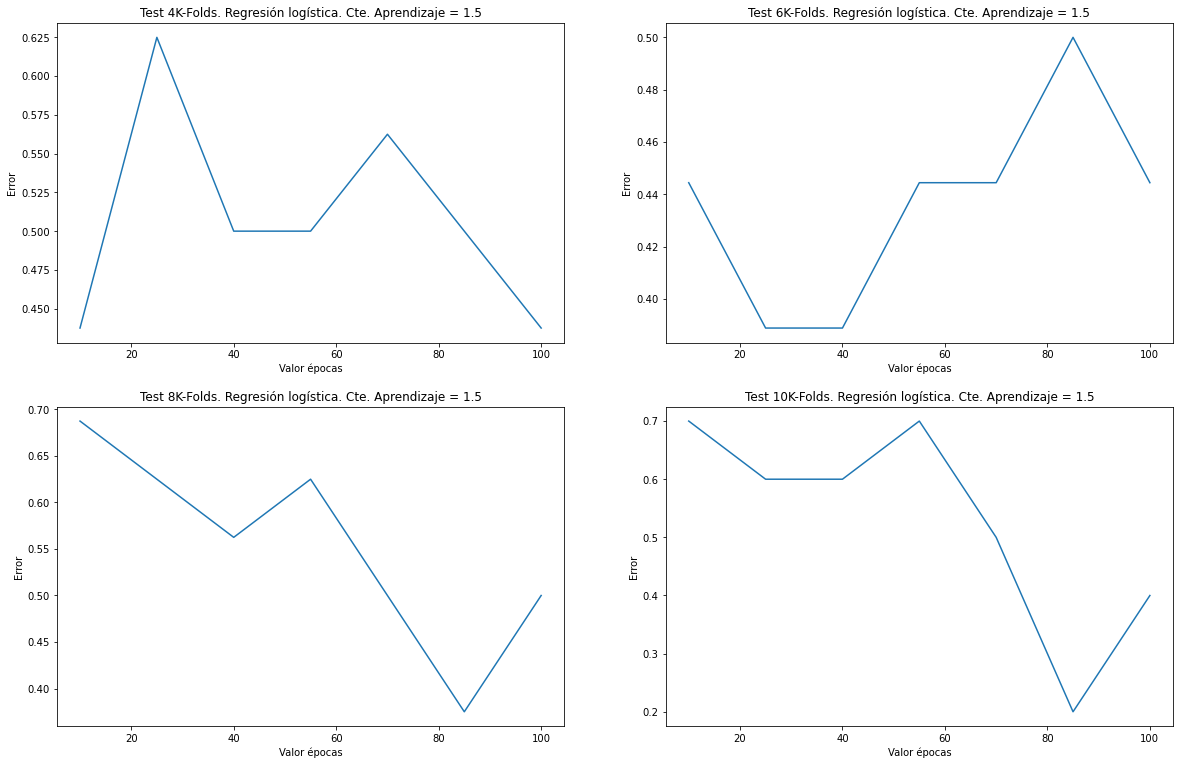

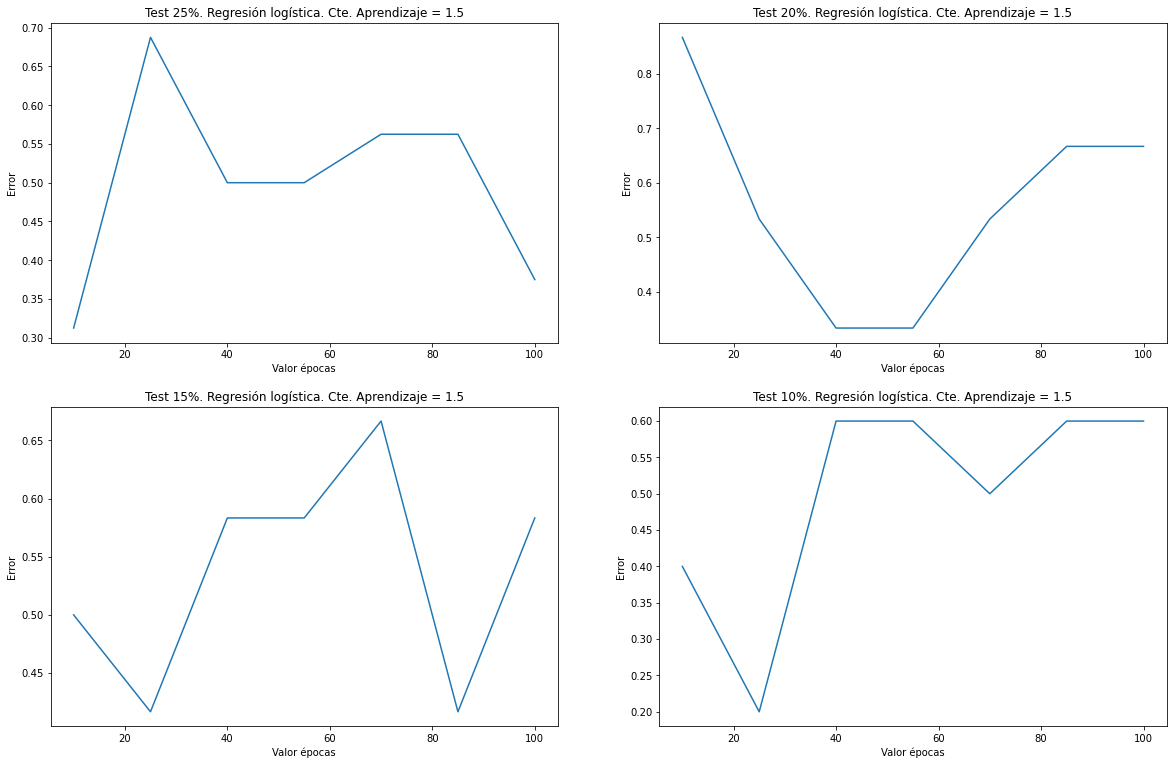

In [9]:
utils.plot_epoch(errorMedioWDBCVC, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS, 1.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=2.0

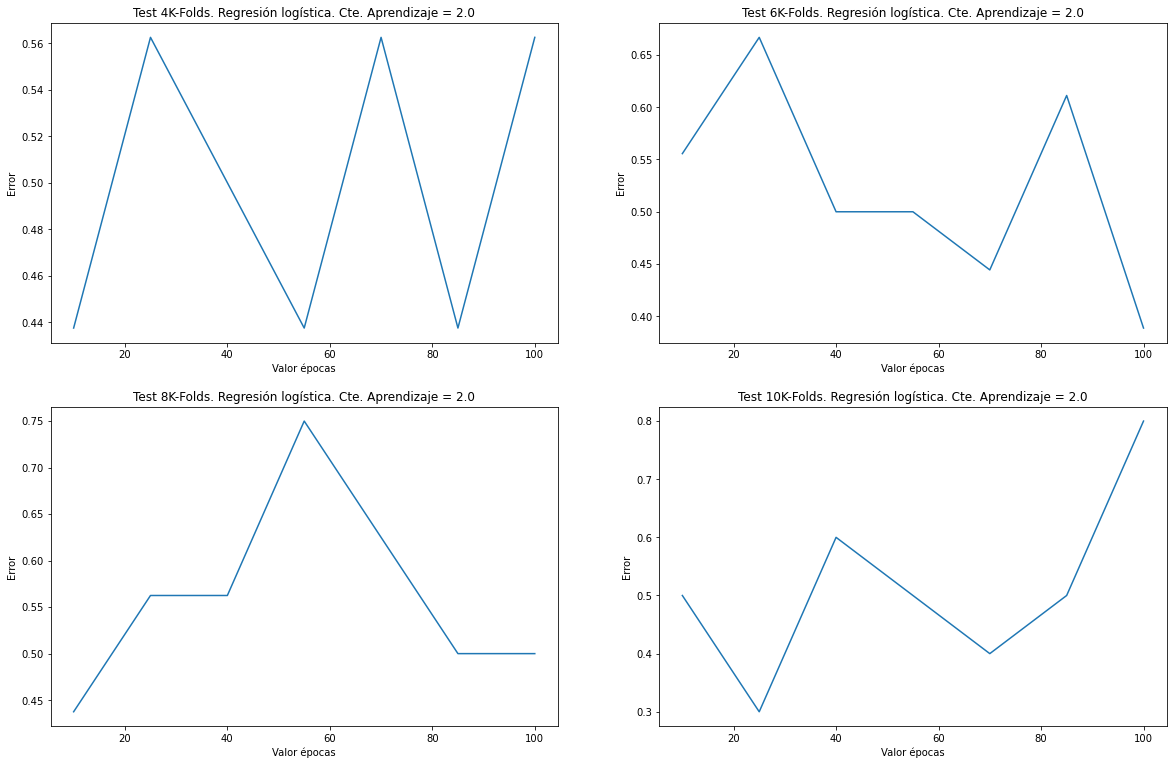

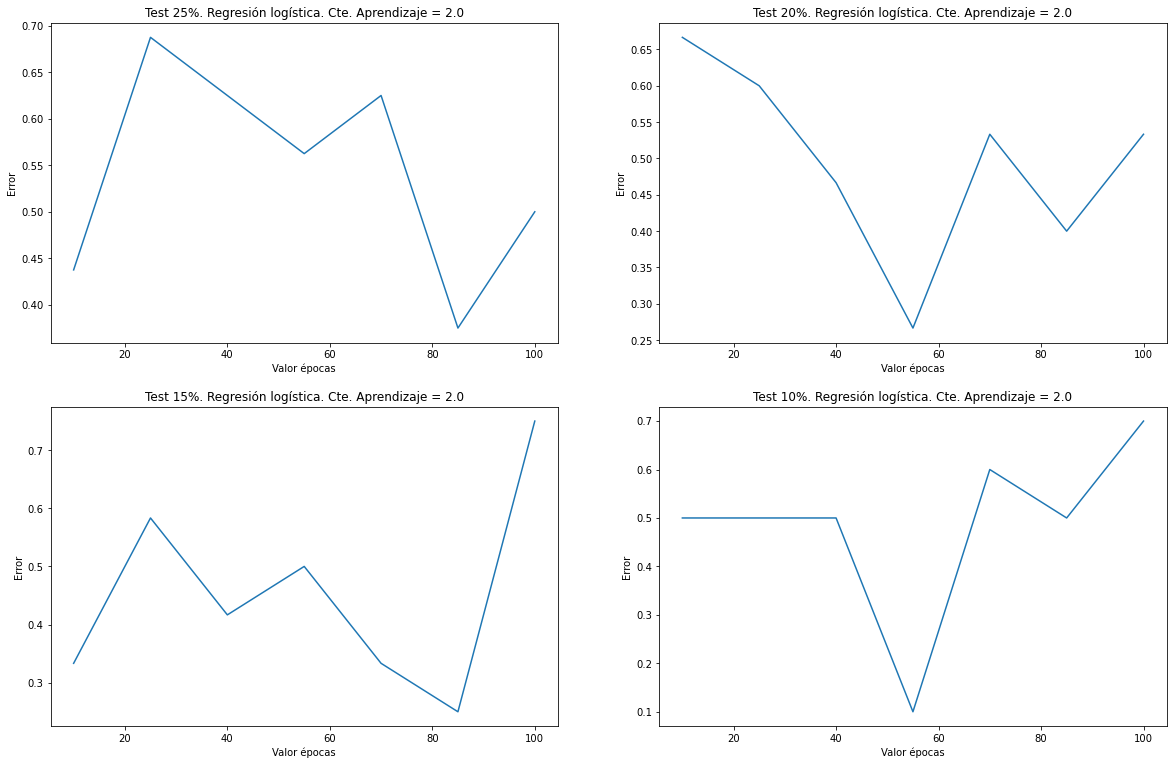

In [10]:
utils.plot_epoch(errorMedioWDBCVC, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN WDBC
### 1.2 Efecto de la Cte. de aprendizaje
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte. 

#### 1.2.1 *Pima-Indians-Diabetes* Épocas = 100 CAMBIAR ÉPOCAS

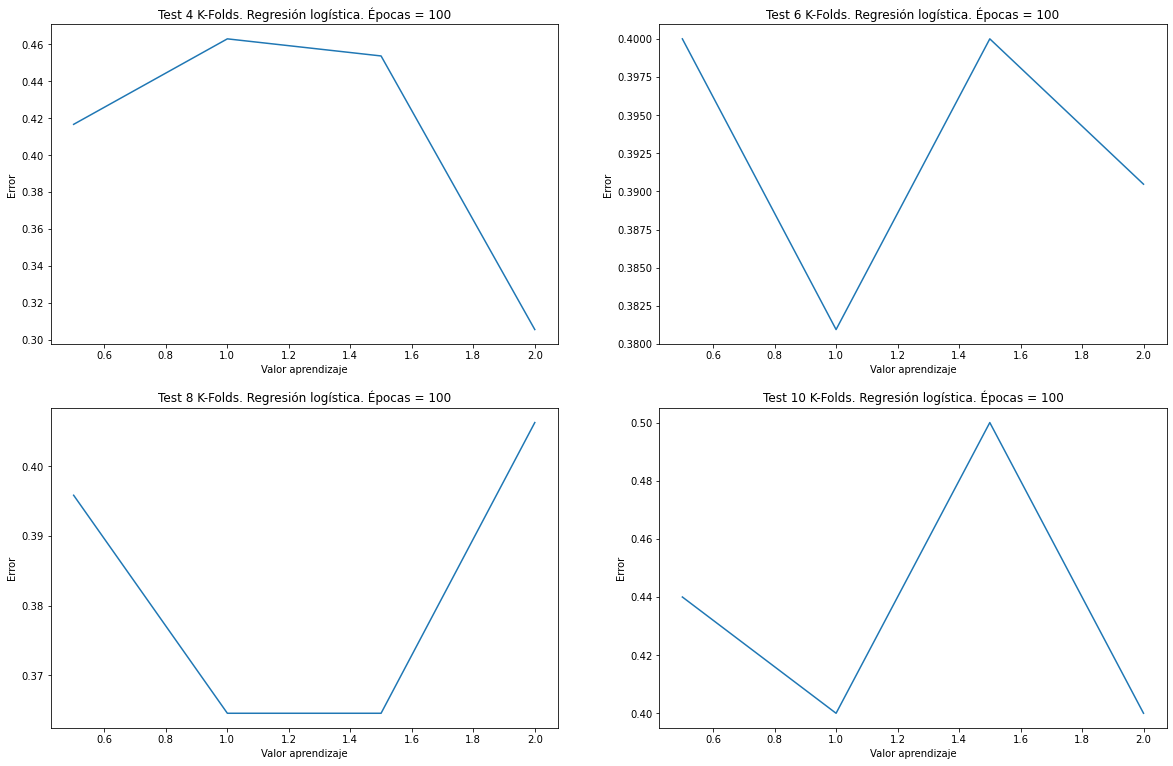

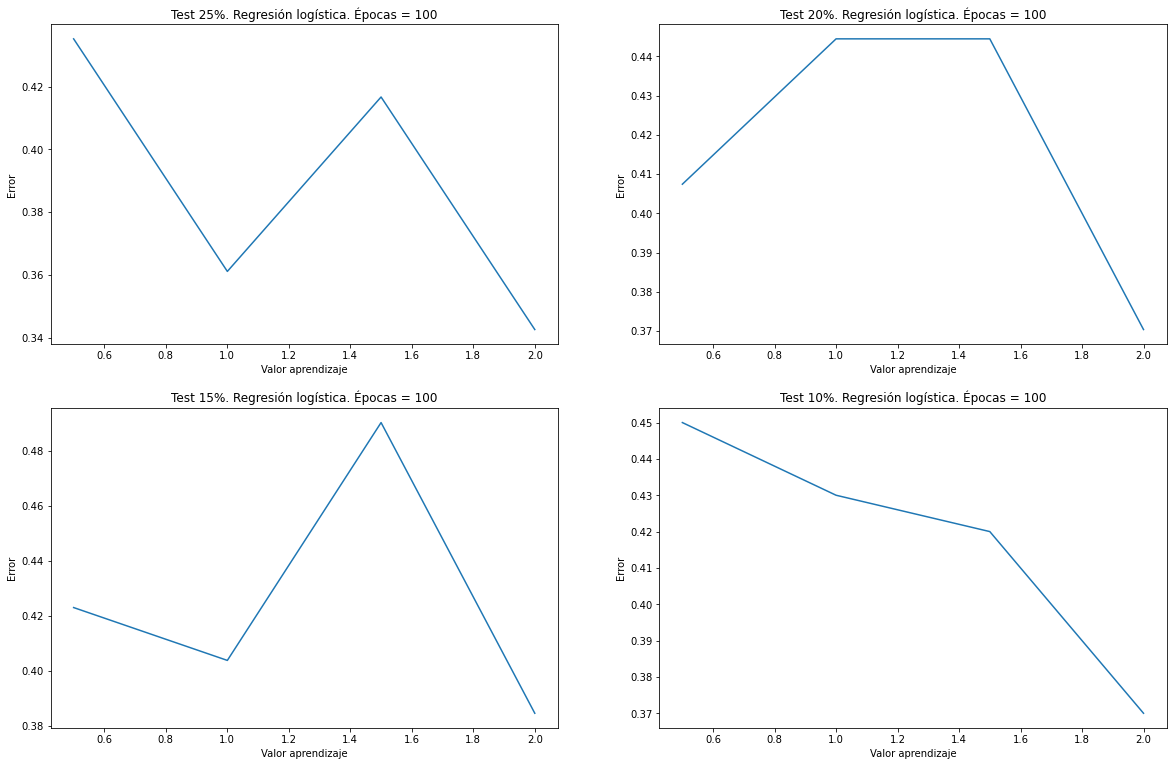

In [11]:
utils.plot_aprendizaje(errorMedioPimaVS, 100, False)
utils.plot_aprendizaje(errorMedioPimaVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN PIMA
#### 1.2.2 *WDBC* Épocas = 100 CAMBIAR ÉPOCAS

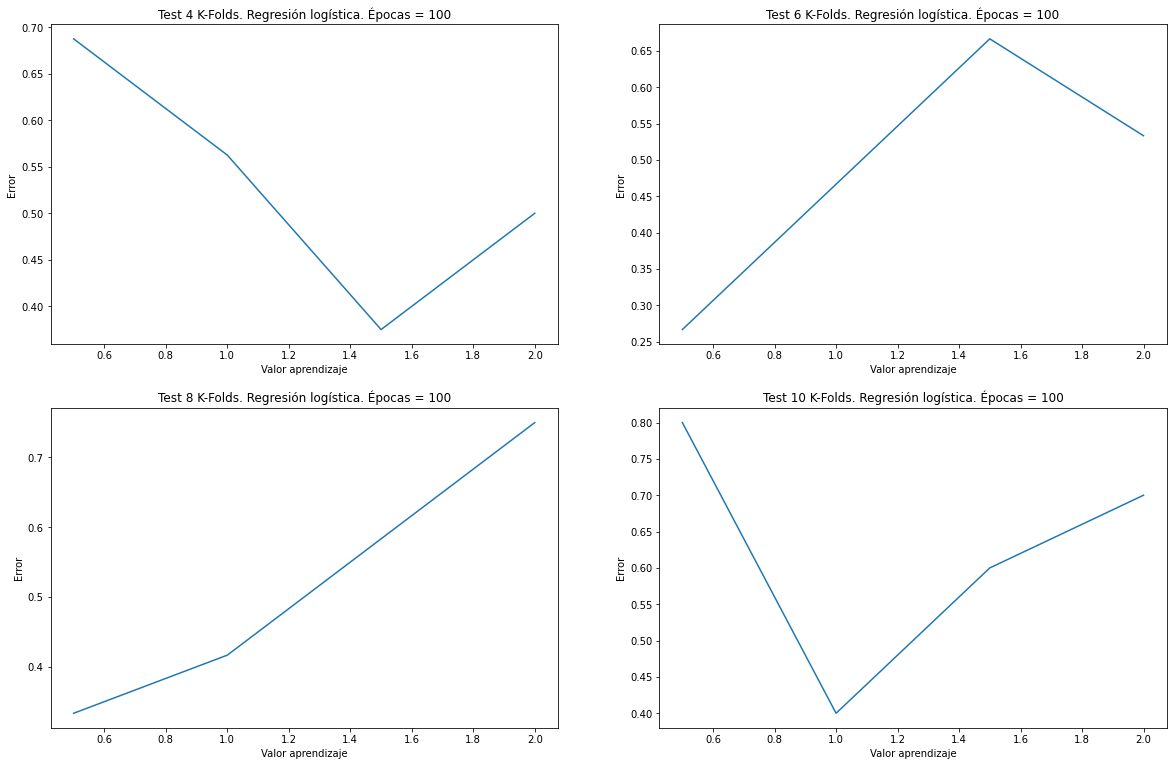

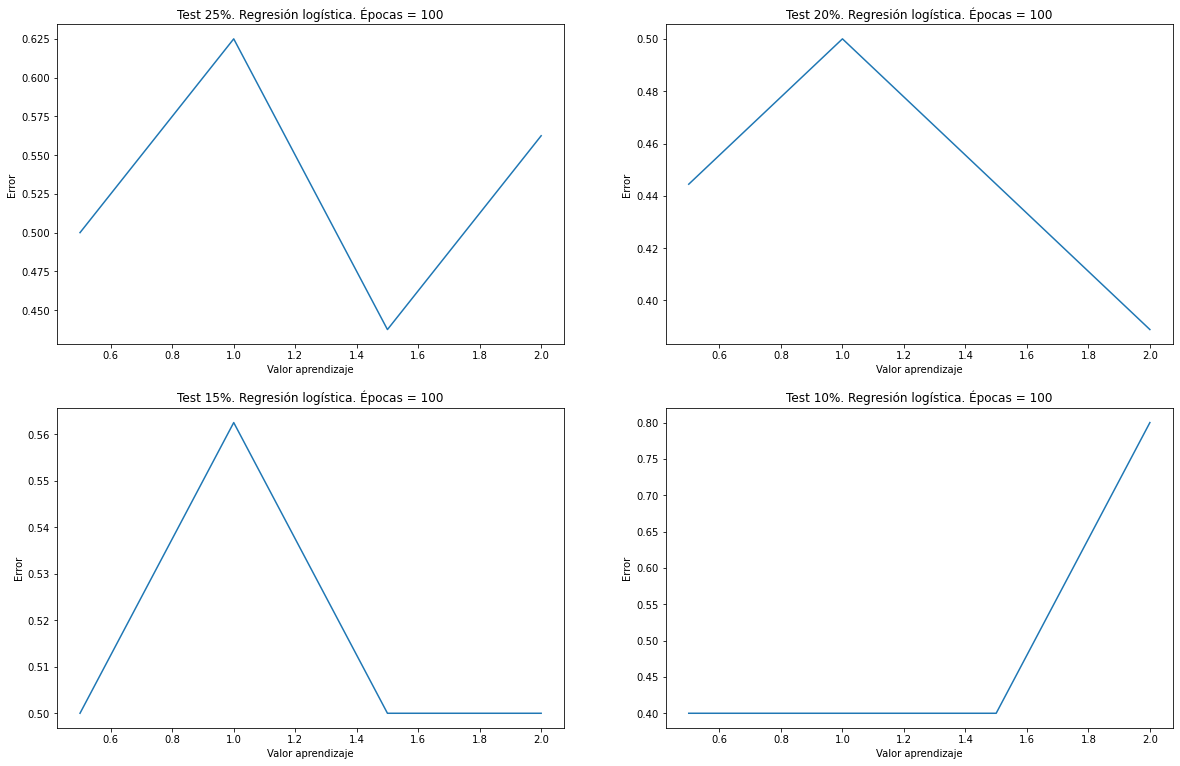

In [12]:
utils.plot_aprendizaje(errorMedioWDBCVS, 100, False)
utils.plot_aprendizaje(errorMedioWDBCVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN WDBC
#### 1.2.3 Error medio PIMA

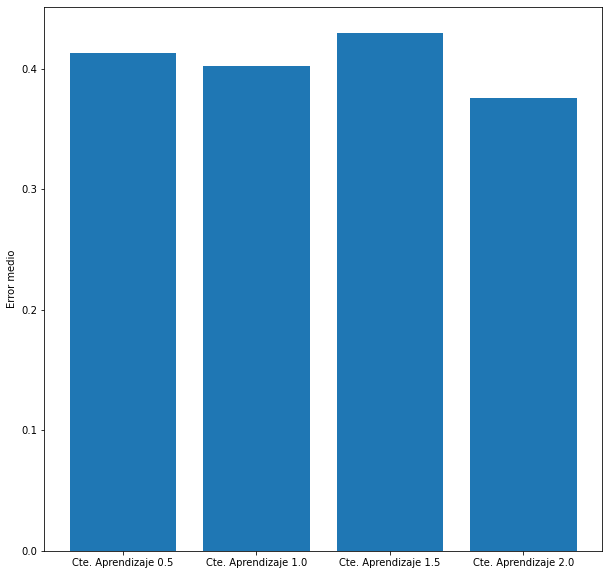

In [13]:
datos = (errorMedioPimaVS, errorMedioPimaVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS PIMA
#### 1.2.4 Error medio WDBC

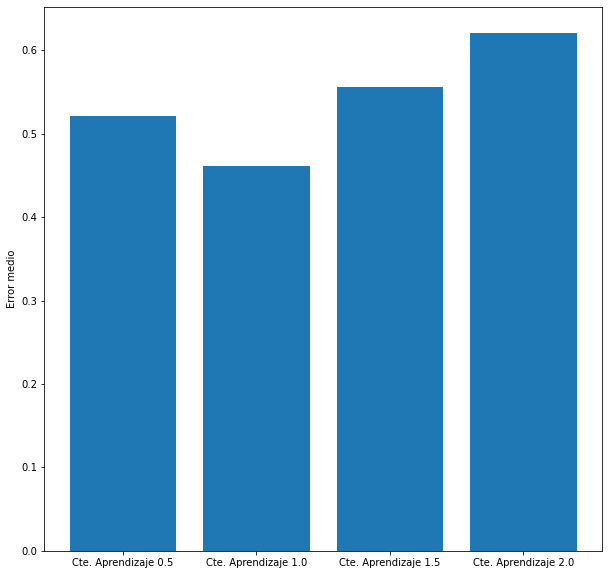

In [14]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS WDBC
## 1.3 CONCLUSIÓN
Mencionar:
* pocas epoch malo
* muchas epoch malo (innecesario)
* Punto medio depende del problema y del dataset
* cte. aprendizaje mejor
* Como afecta la constante de aprendizaje (movimientos en los pesos más bruscos)
* Poca cte. implica más épocas
* Analogia balon cayendo sobre un valle y una canica para explicar la constante de aprendizaje

## 2. Resultados Regresión Logística (Implementación SKLearn)
De nuevo, se van a mostrar tablas con la tasa de error que cometen los modelos de **SKLearn**. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

Antes de mostrar los datos responderemos a la siguiente pregunta:

### Diferencia entre *LogisticRegression* y *SGDClassifier*

Responder diferencia

### Tablas *Logistic Regression* (sin cte aprendizaje)

In [15]:
errorMedioPimaVC_logistic, errorMedioPimaVS_logistic, errorMedioWDBCVC_logistic, errorMedioWDBCVS_logistic = utils.RL_test_SK_logistic(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10				Pima - Error		WDBC - Error
Validación Simple 25%			0.361111		0.550000
Validación Cruzada K-Folds=4		0.342593		0.675000
Validación Simple 20%			0.400000		0.700000
Validación Cruzada K-Folds=6		0.305556		0.666667
Validación Simple 15%			0.372549		0.666667
Validación Cruzada K-Folds=8		0.333791		0.562500
Validación Simple 10%			0.372727		0.650000
Validación Cruzada K-Folds=10		0.310909		0.850000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=25*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=25				Pima - Error		WDBC - Error
Validación Simple 25%			0.305556		0.550000
Validación Cruzada K-Folds=4		0.324074		0.400000
Validación Simple 20%			0.354545		0.500000
Validación Cruzada K-Folds=6		0.361111		0.333333
Validación Simple 15%			0.372549		0.333333
Validación Cruzada K-Folds=8		0.343407		0.458333
Validación Simple 10%			0.418182		0.550000
Validación Cruzada K-Folds=10		0.340000		0.500000

*-*-*

### Tablas *SGBD Regression*

In [16]:
errorMedioPimaVC_SGBD, errorMedioPimaVS_SGBD, errorMedioWDBCVC_SGBD, errorMedioWDBCVS_SGBD = utils.RL_test_SK_SGBD(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.490741		0.550000
Validación Cruzada K-Folds=4			0.462963		0.500000
Validación Simple 20%				0.418182		0.550000
Validación Cruzada K-Folds=6			0.379630		0.611111
Validación Simple 15%				0.362745		0.611111
Validación Cruzada K-Folds=8			0.482830		0.500000
Validación Simple 10%				0.418182		0.400000
Validación Cruzada K-Folds=10			0.406364		0.500000
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.472222		0.650000
Validación Cruzada K-Folds=4			0.398148		0.550000
Validación Simple 20%				0.427273		0.550000
Validación Cruzada K-Folds=6			0.453704		0.611111
Validación Simple 15%				0.480392		0.555556
Validación Cruzada K-Folds=8			0.342720		0.562500
Validación Simple 10%				0.481818		0.550000
Validación Cruzada K-Folds=10			0.396364		0.500000
Test Épocas=10 Constante ap

Validación Simple 20%				0.500000		0.700000
Validación Cruzada K-Folds=6			0.333333		0.388889
Validación Simple 15%				0.450980		0.611111
Validación Cruzada K-Folds=8			0.471841		0.541667
Validación Simple 10%				0.372727		0.650000
Validación Cruzada K-Folds=10			0.397273		0.500000
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.462963		0.350000
Validación Cruzada K-Folds=4			0.416667		0.500000
Validación Simple 20%				0.400000		0.650000
Validación Cruzada K-Folds=6			0.444444		0.500000
Validación Simple 15%				0.431373		0.444444
Validación Cruzada K-Folds=8			0.460852		0.458333
Validación Simple 10%				0.527273		0.700000
Validación Cruzada K-Folds=10			0.379091		0.500000
Test Épocas=70 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.370370		0.550000
Validación Cruzada K-Folds=4			0.435185		0.450000
Validación Simple 20%				0.345455		0.500000
Validación Cruzada K-Folds=6			0.425926		0.611111
Validación Simpl

### 2.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 2.1.1 *LogisticRegression Pima-Indians-Diabetes*

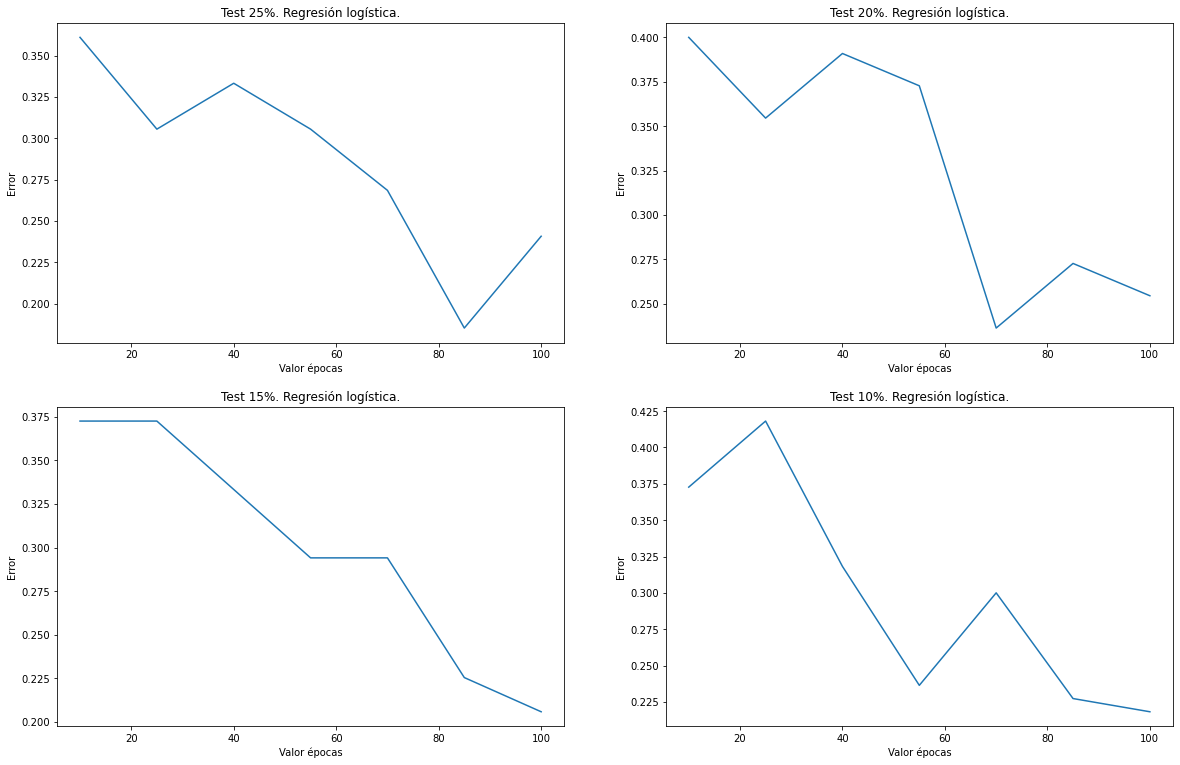

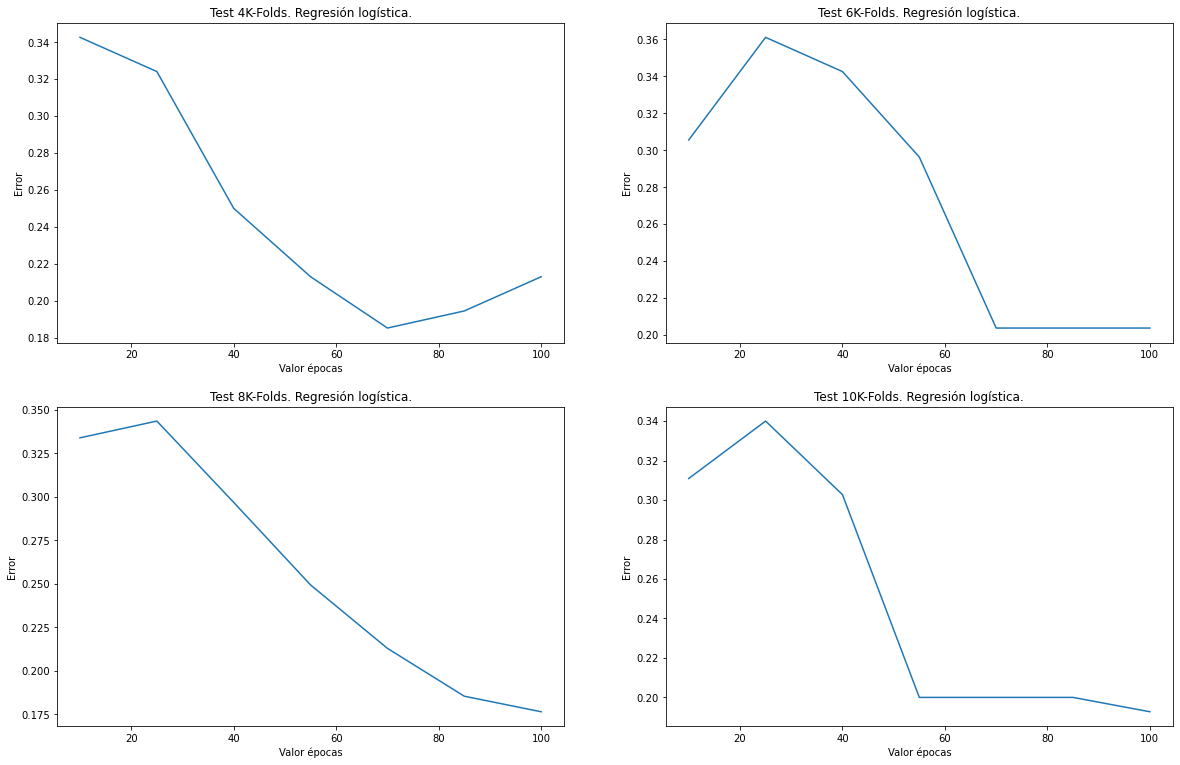

In [23]:
utils.plot_logistic(errorMedioPimaVS_logistic, True)
utils.plot_logistic(errorMedioPimaVC_logistic, False)

#### 2.1.2 *LogisticRegression WDBC*

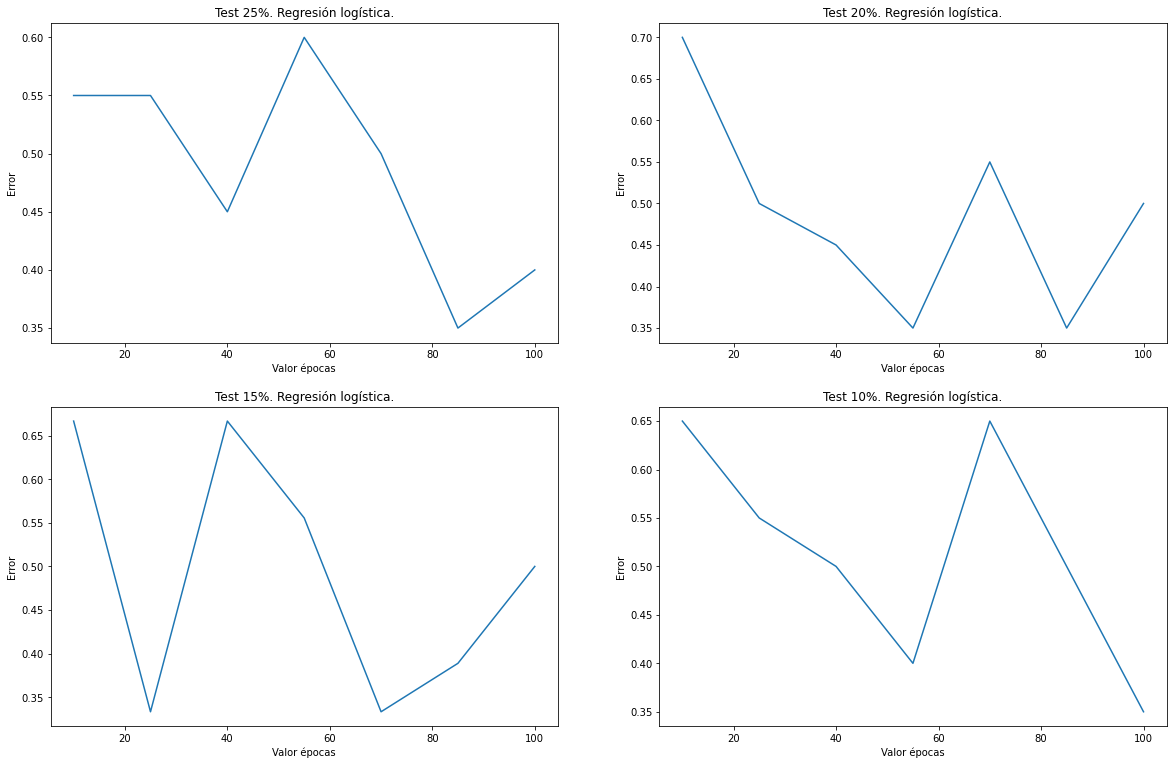

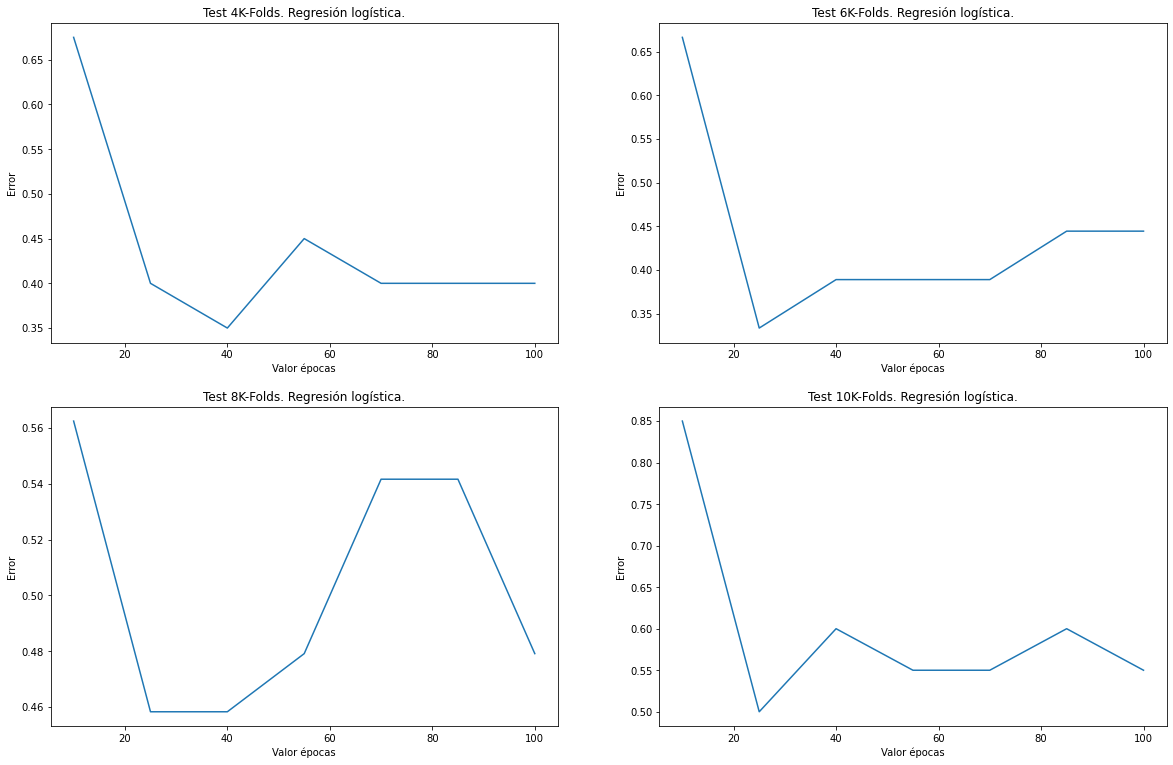

In [24]:
utils.plot_logistic(errorMedioWDBCVS_logistic, True)
utils.plot_logistic(errorMedioWDBCVC_logistic, False)

#### 2.1.1.1 *SGBD Classifier Pima-Indians-Diabetes* Cte. aprendizaje=0.5

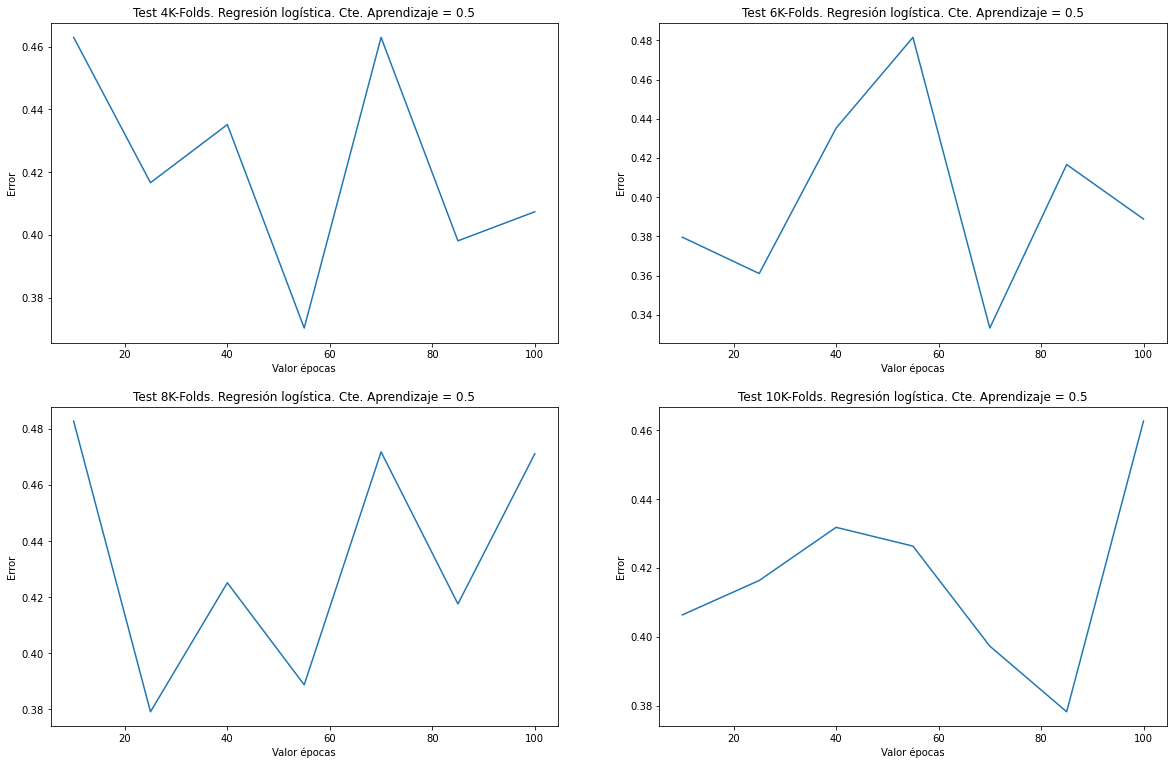

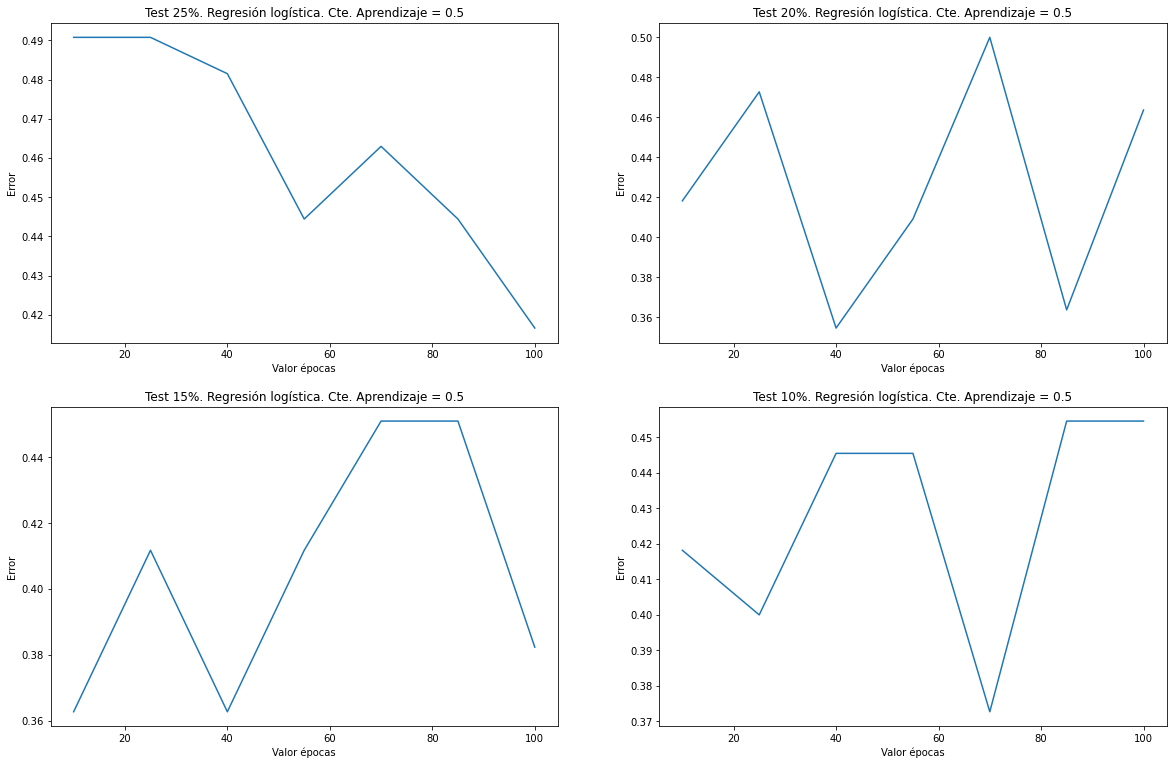

In [33]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 0.5, True)

#### 2.1.1.2 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.0

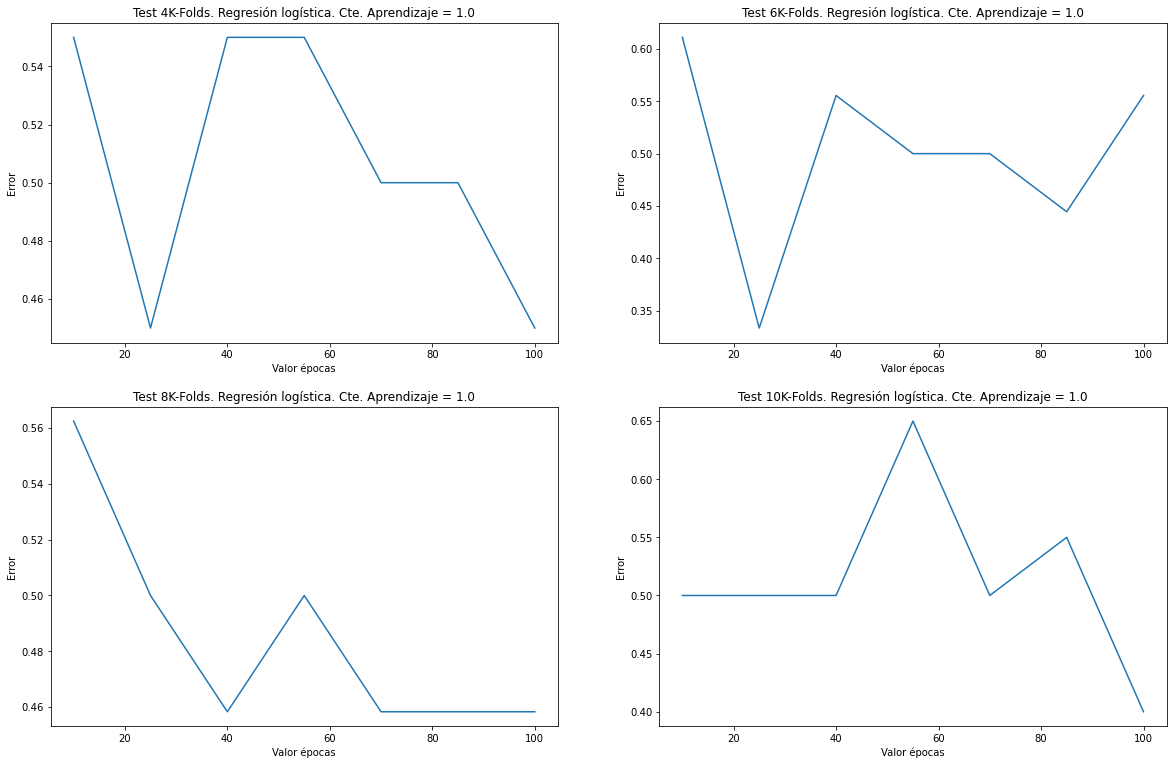

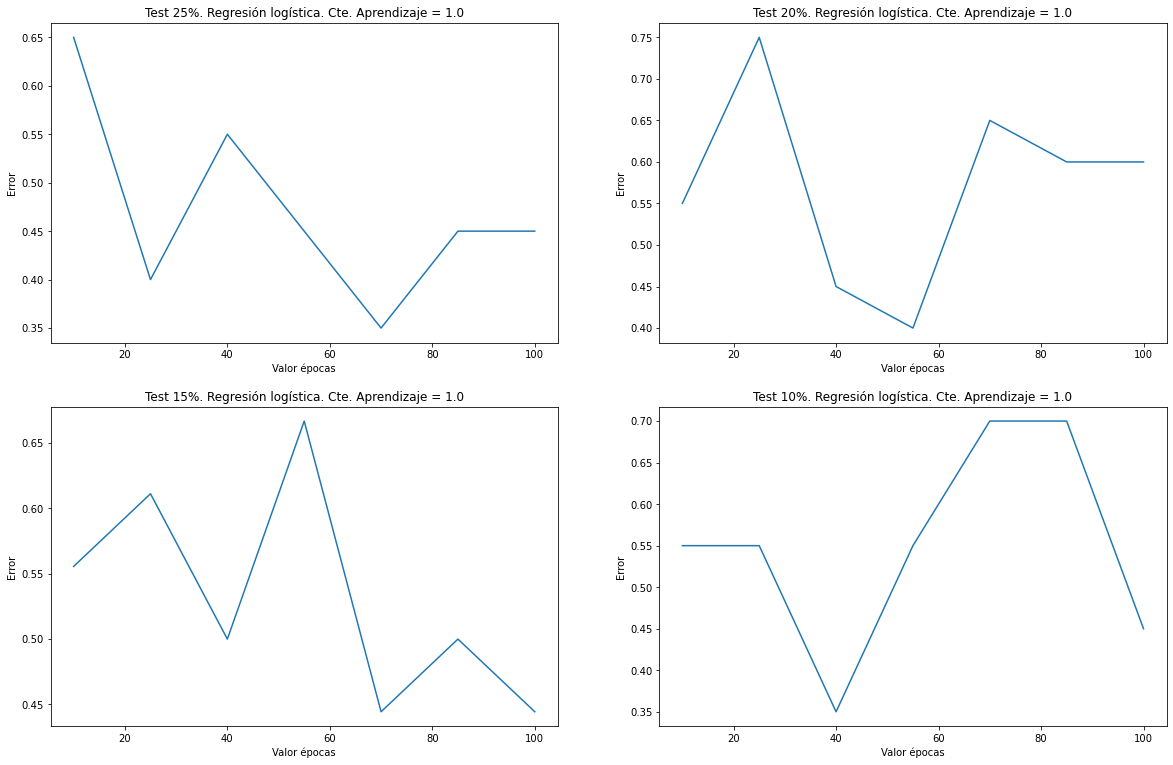

In [29]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.1.3 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.5

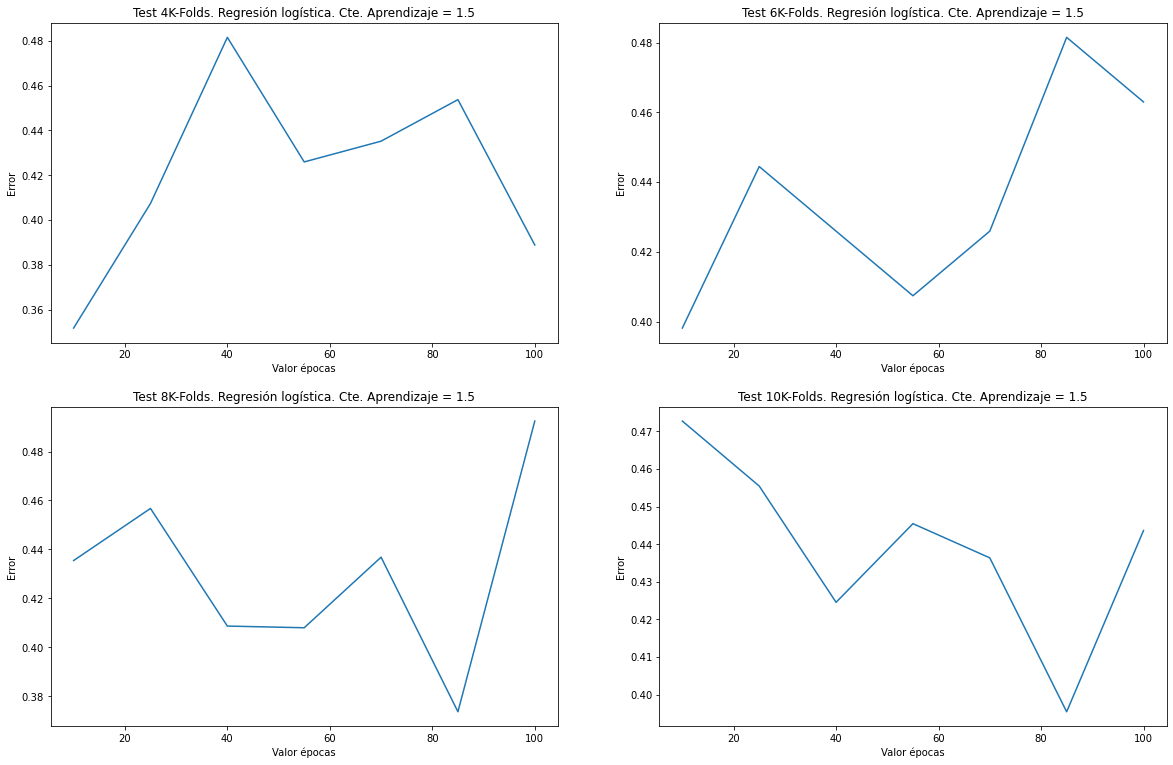

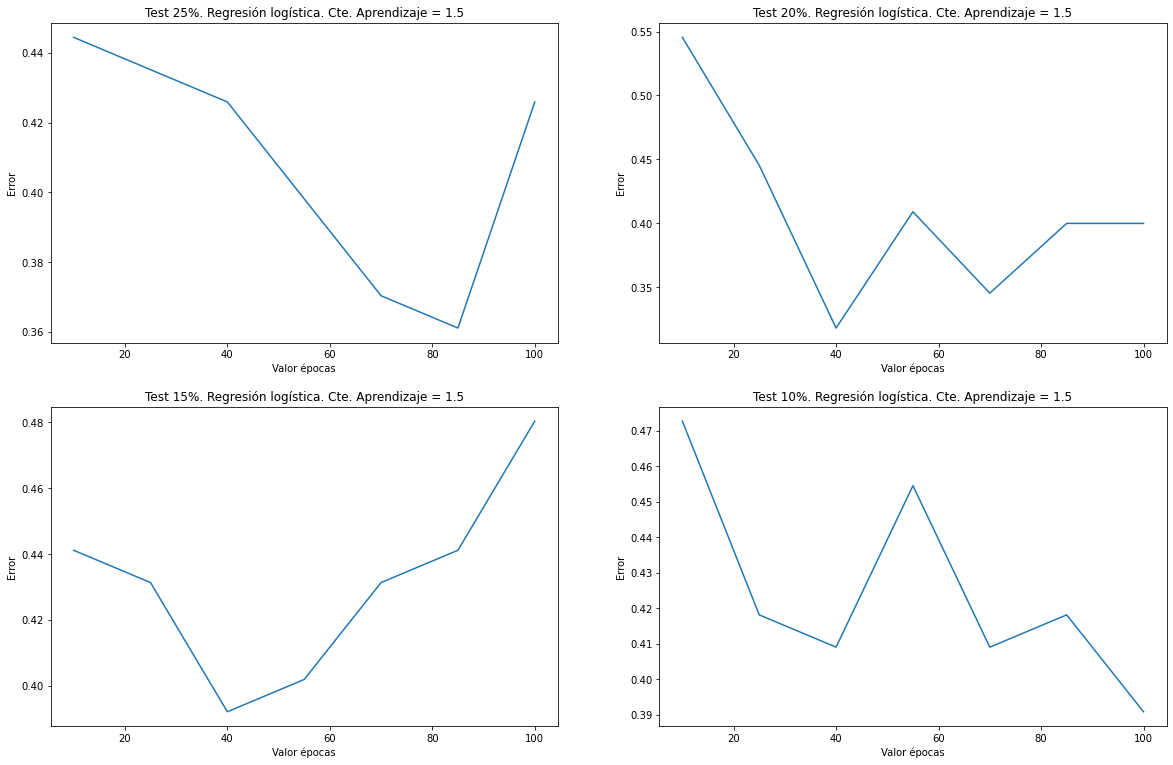

In [34]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 1.5, True)

#### 2.1.1.4 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=2.0

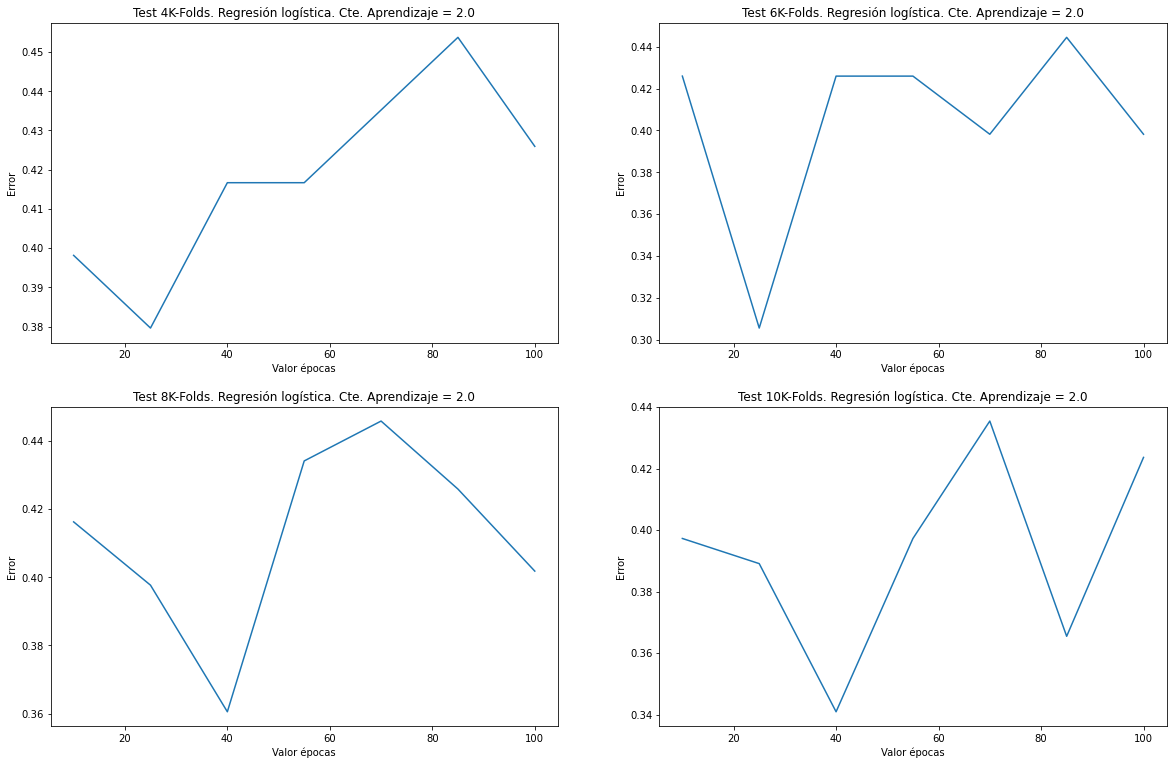

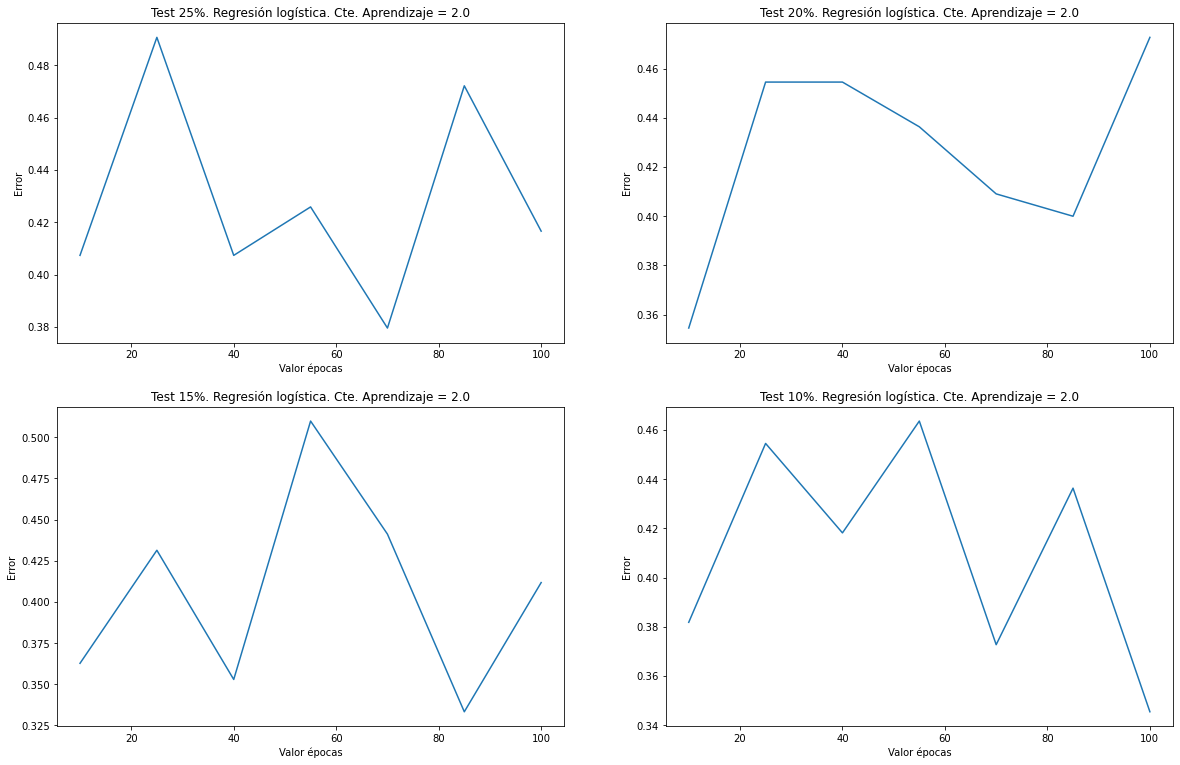

In [35]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 2.0, True)

#### 2.1.2.1 *SGBD Classifier WDBC* Cte. aprendizaje=0.5

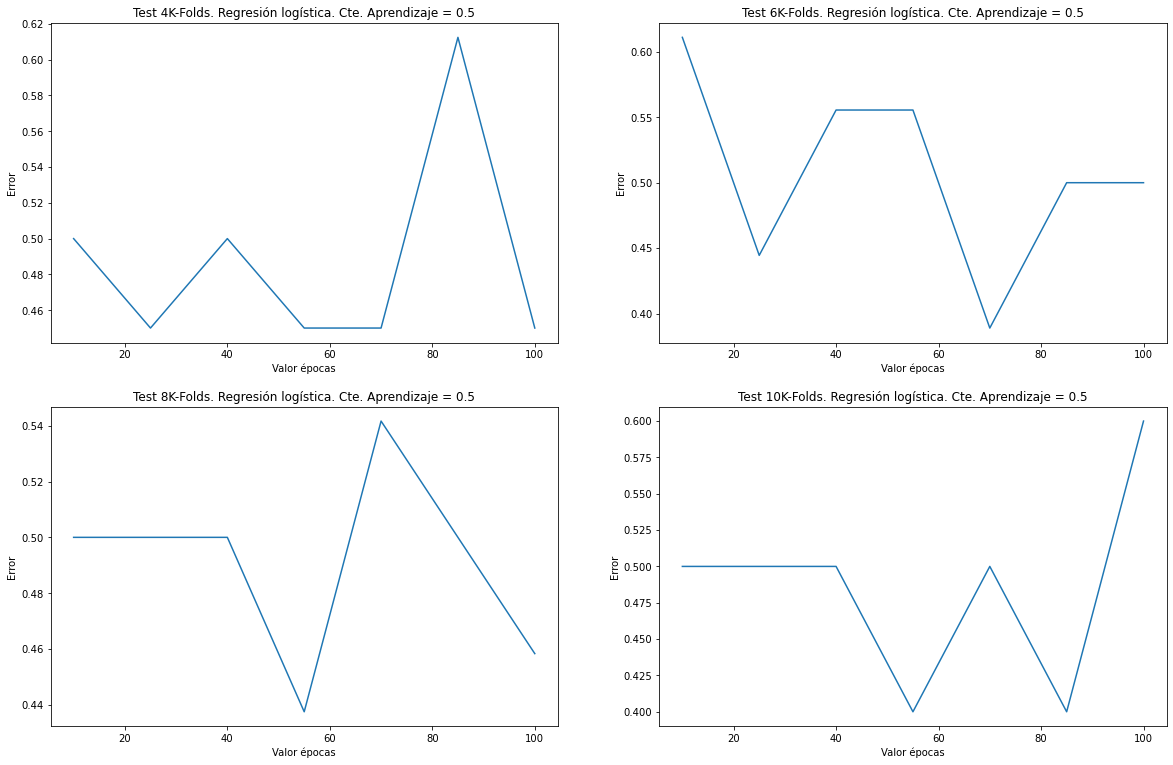

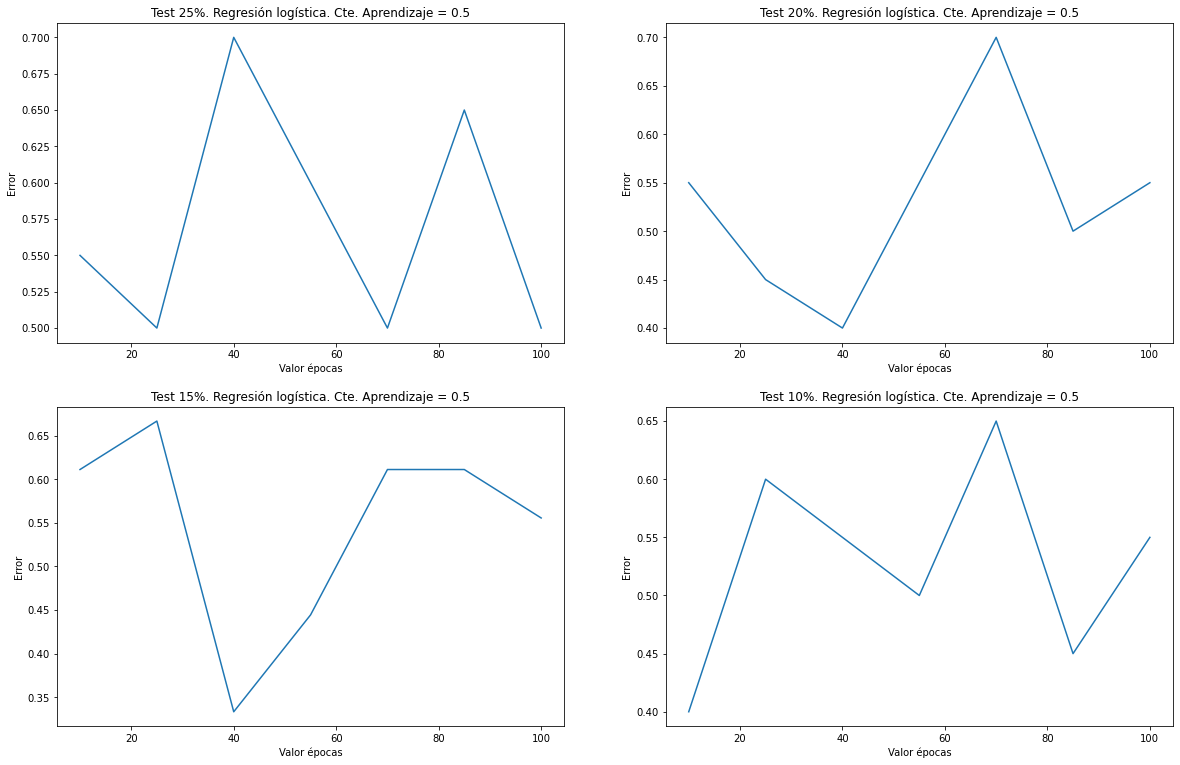

In [39]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 0.5, True)

#### 2.1.2.2 *SGBD Classifier WDBC* Cte. aprendizaje=1.0

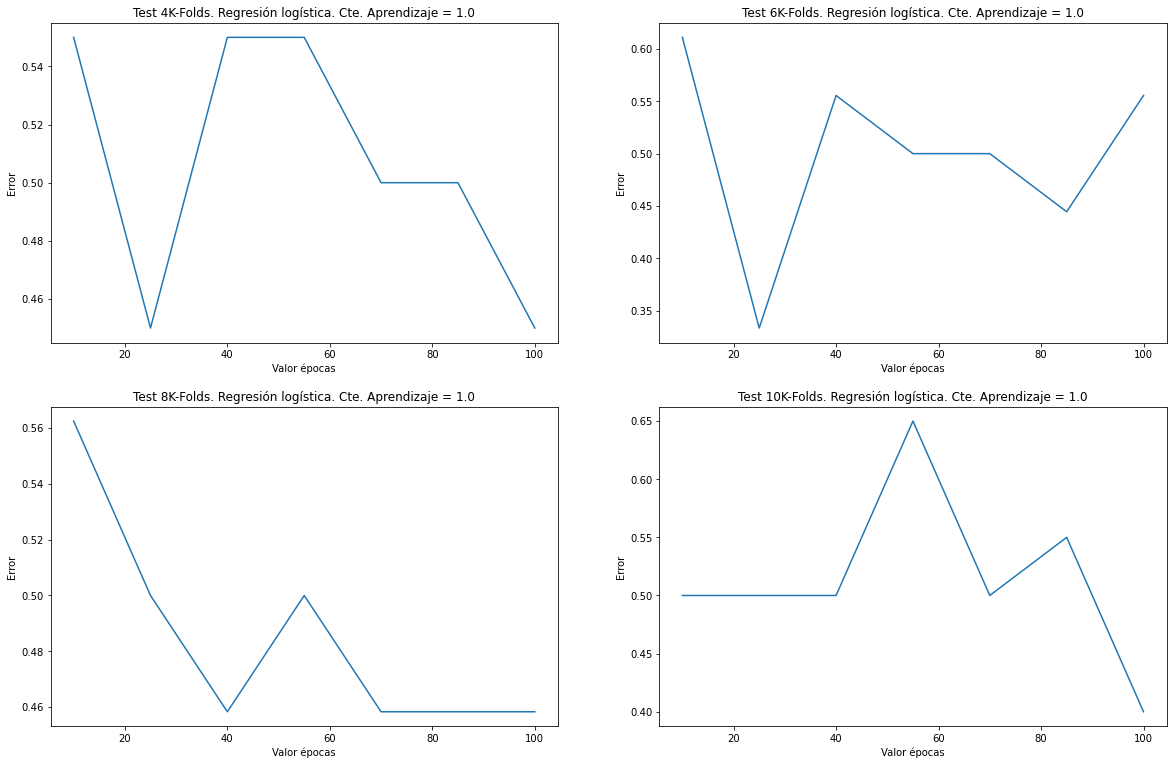

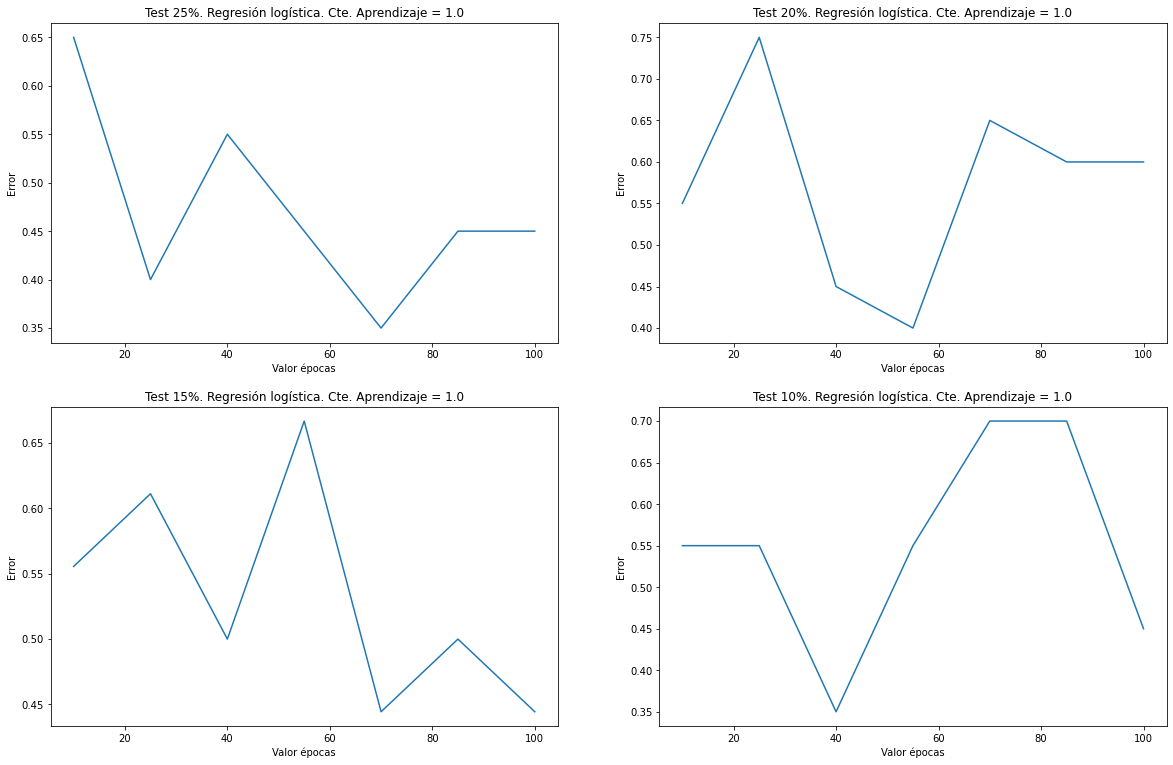

In [40]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.2.3 *SGBD Classifier WDBC* Cte. aprendizaje=1.5

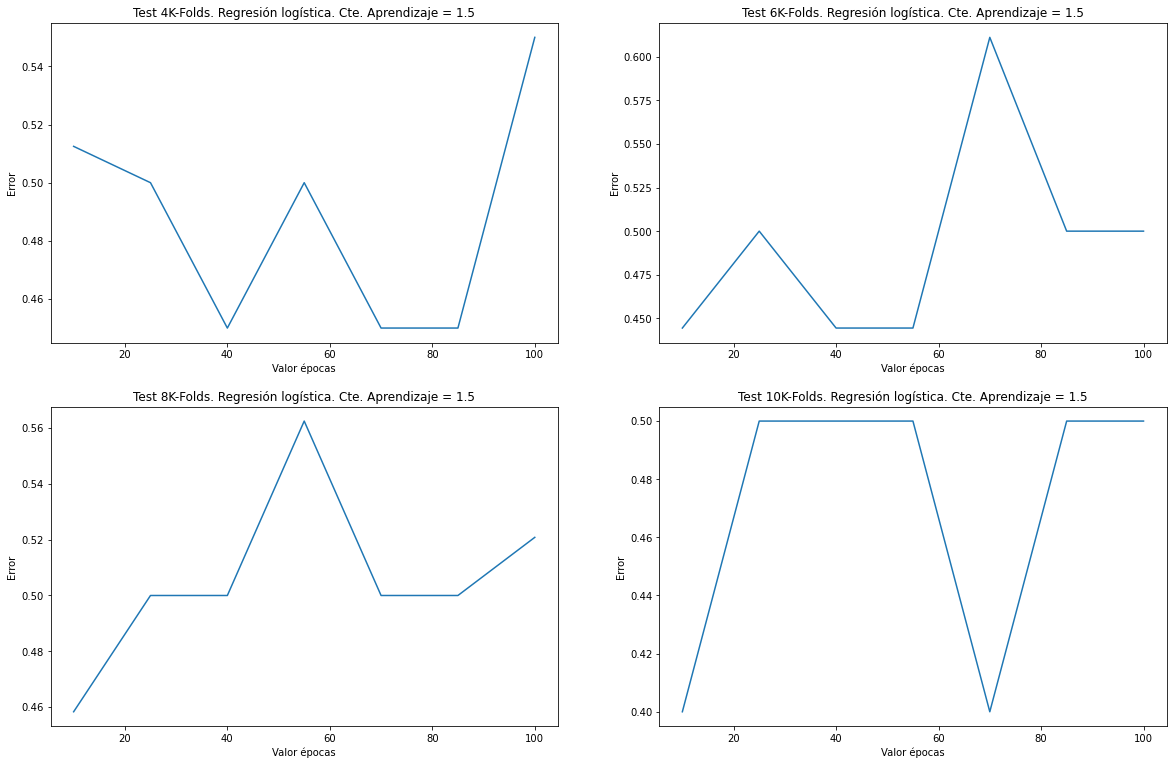

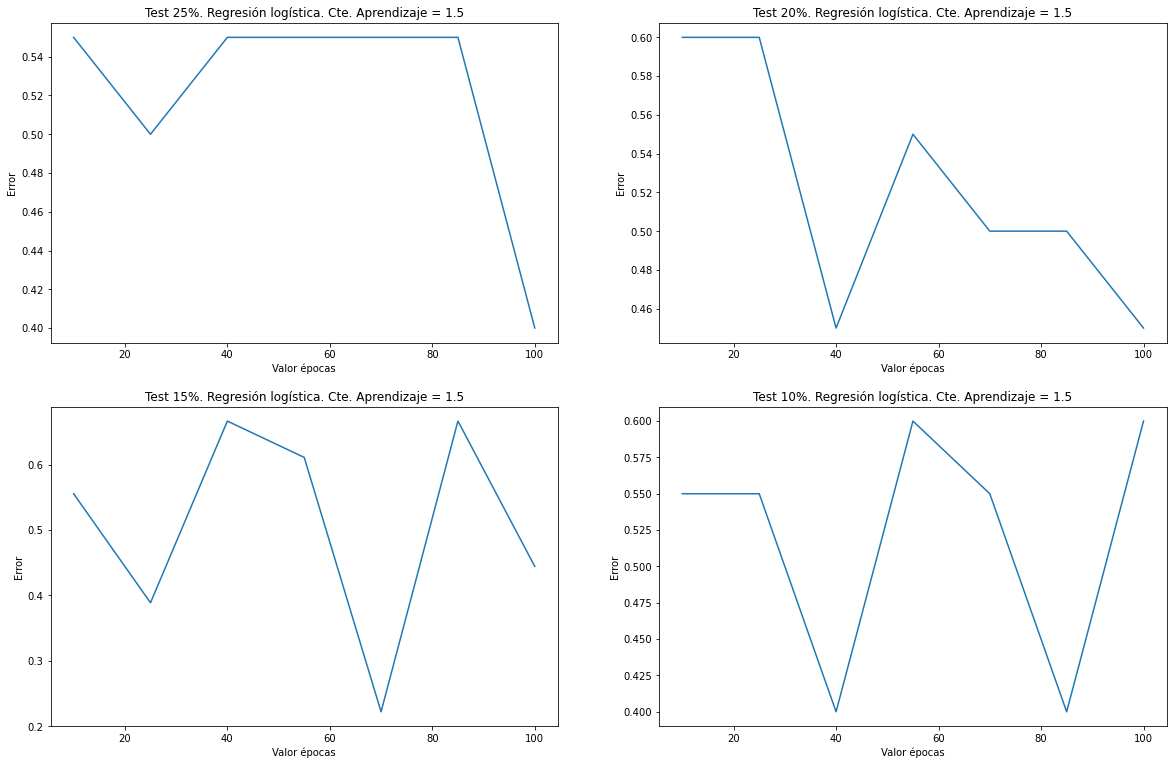

In [41]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.5, True)

#### 2.1.2.4 *SGBD Classifier WDBC* Cte. aprendizaje=2.0

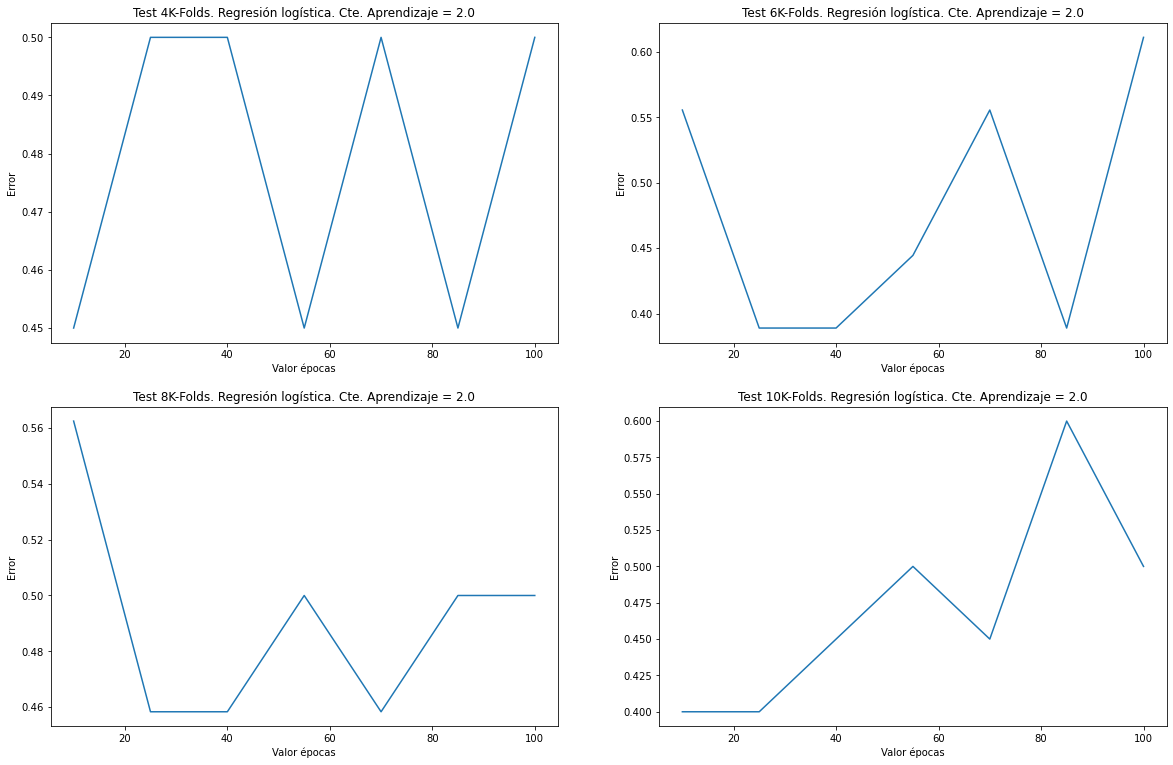

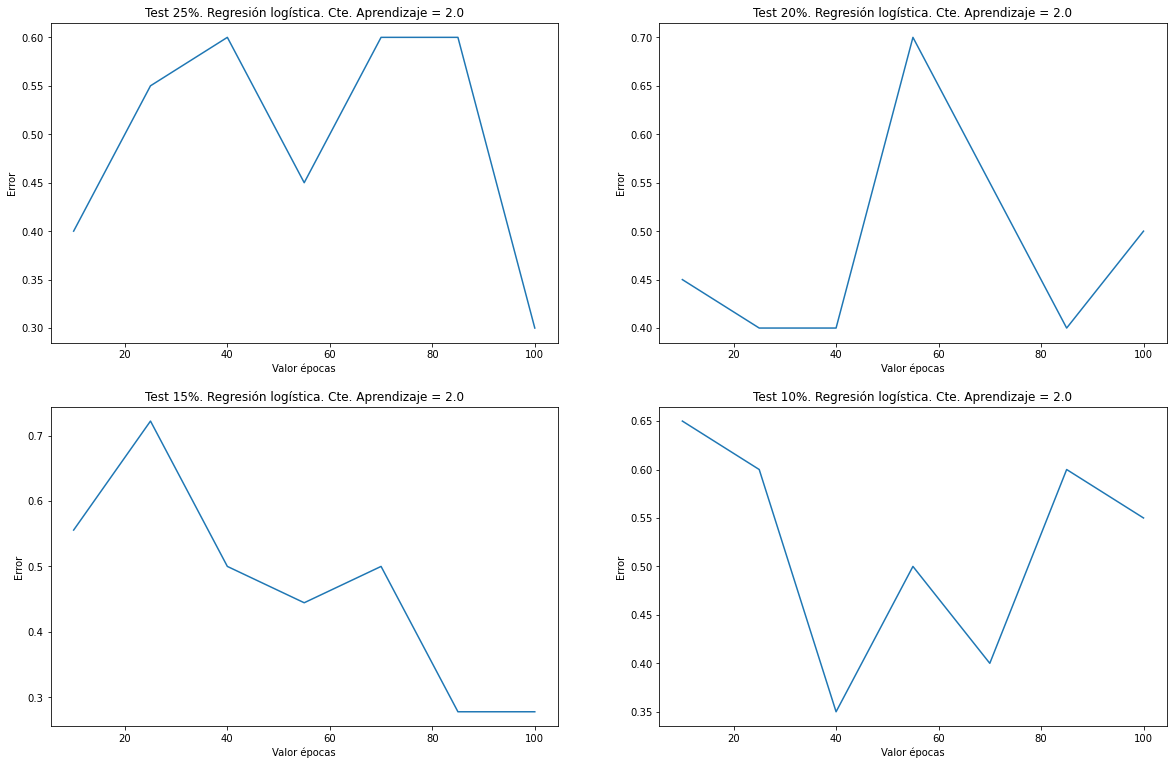

In [38]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 2.0, True)

# Explicación resultados en SKLearn

### 2.2 Efecto de la constante de aprendizaje.
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte.

Como con *LogisticRegression* no podemos establecer el aprendizaje **unicamente se mostrarán los datos con el clasificador SGBD**.
#### 2.2.1 *SGBD Classifier Pima-Indians-Diabetes*

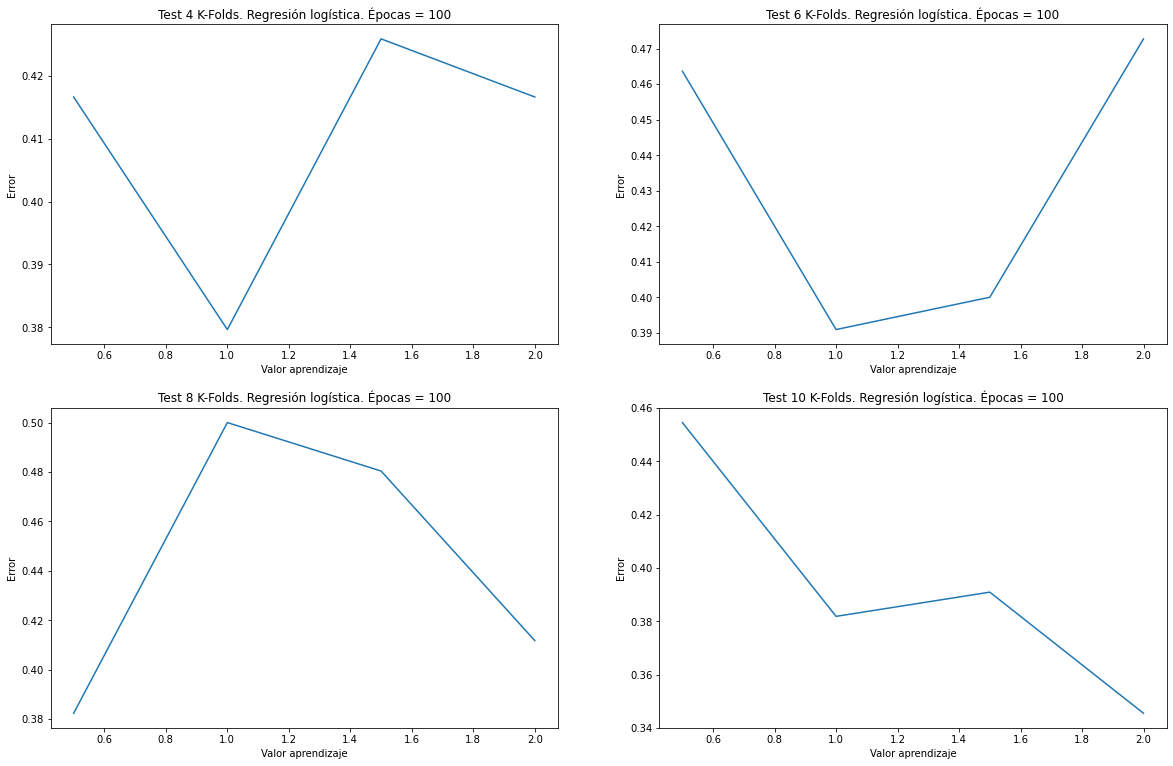

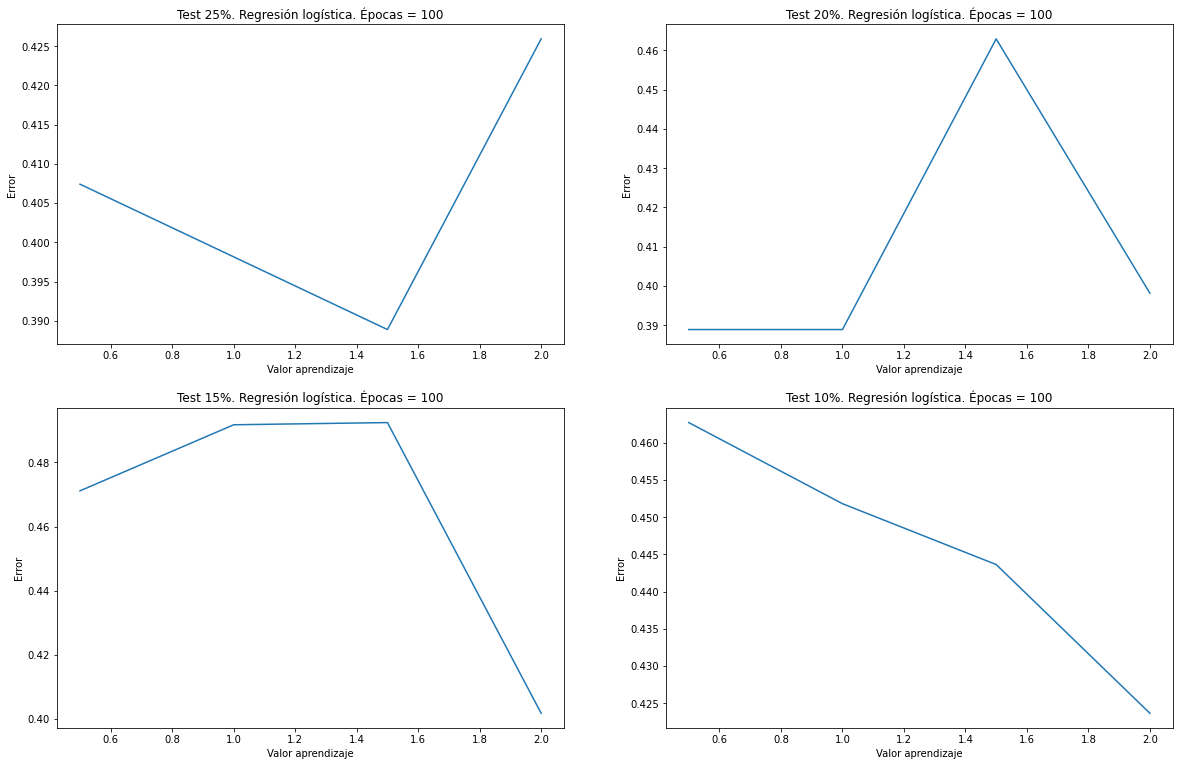

In [44]:
utils.plot_aprendizaje(errorMedioPimaVS_SGBD, 100, False)
utils.plot_aprendizaje(errorMedioPimaVC_SGBD, 100, True)

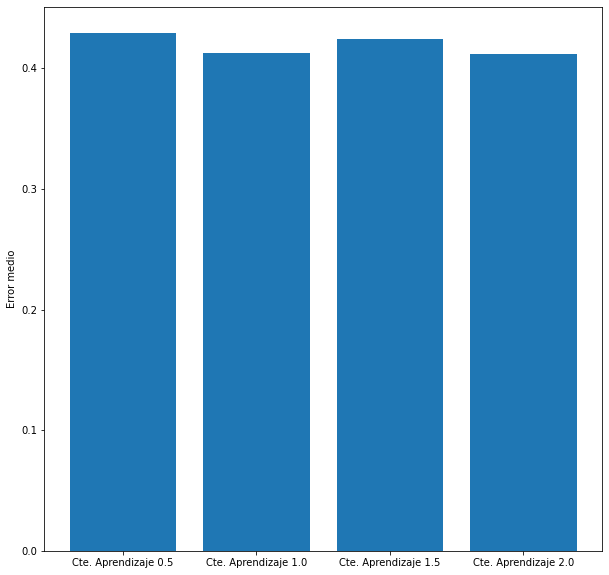

In [46]:
datos = (errorMedioPimaVS_SGBD, errorMedioPimaVS_SGBD)
utils.plot_histograms(datos, 100)

#### 2.2.2 *SGBD Classifier WDBC*

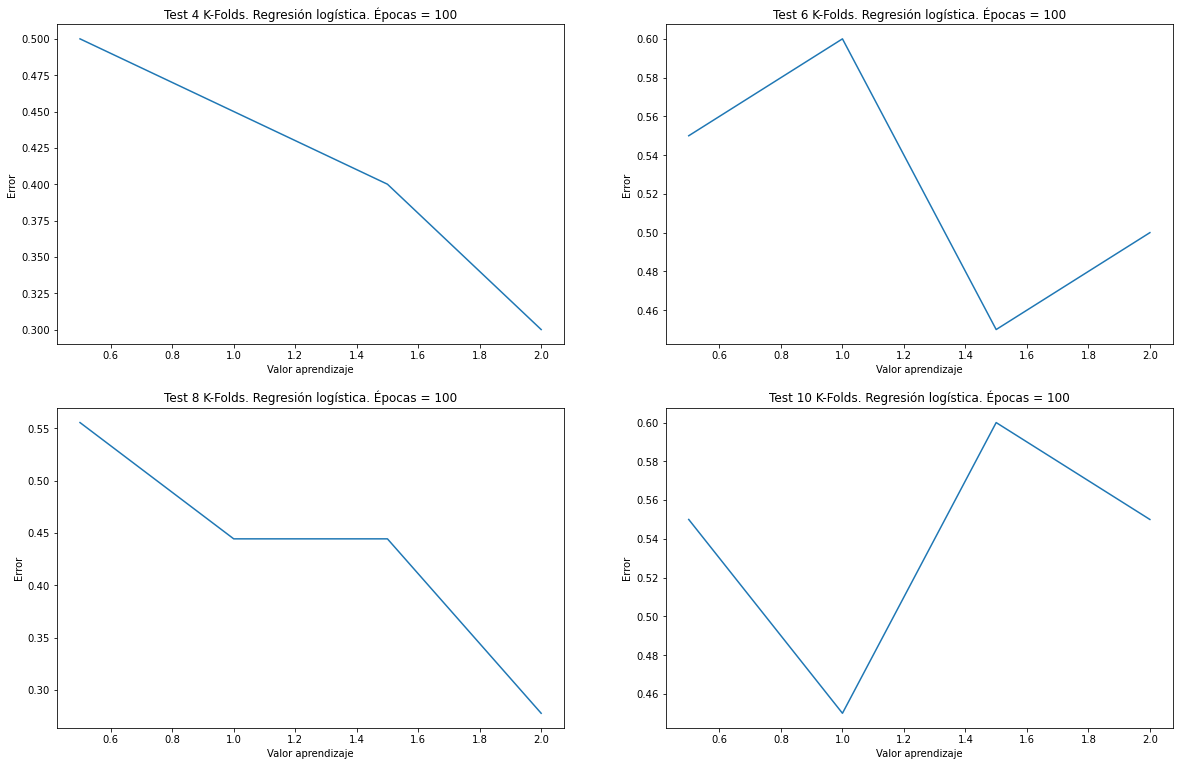

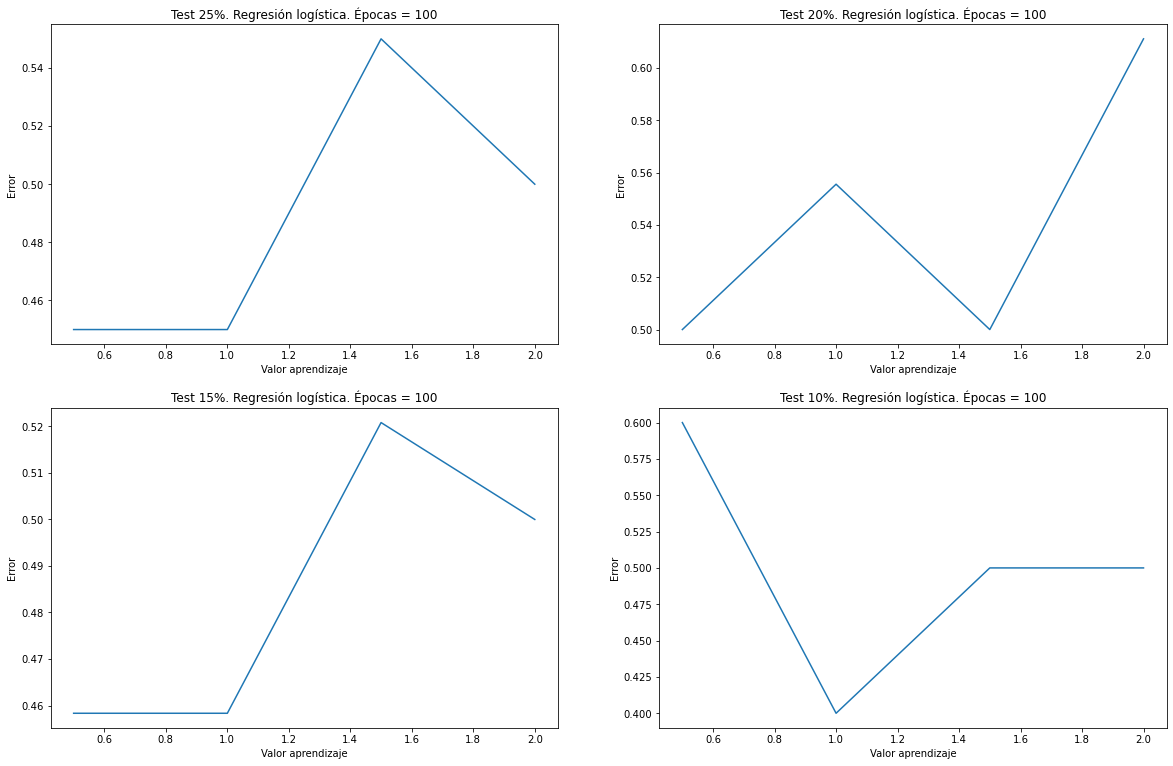

In [43]:
utils.plot_aprendizaje(errorMedioWDBCVS_SGBD, 100, False)
utils.plot_aprendizaje(errorMedioWDBCVC_SGBD, 100, True)

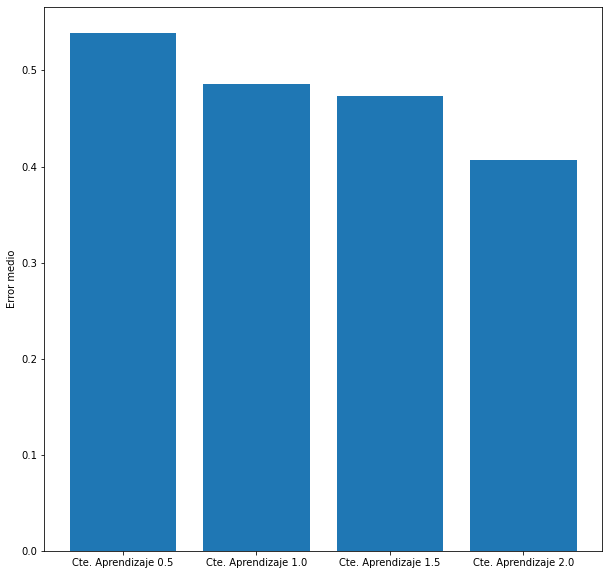

In [45]:
datos = (errorMedioWDBCVS_SGBD, errorMedioWDBCVS_SGBD)
utils.plot_histograms(datos, 100)

# Conclusion SKLearn
* Mencionar el funcionamiento de logistic regression y que no acepta cte.
* Mencionar el comportamiento de ambas

### 2.3 Comparación implementación SKLearn e implementación propia
#### 2.3.1 *Pima-Indians-diabetes*

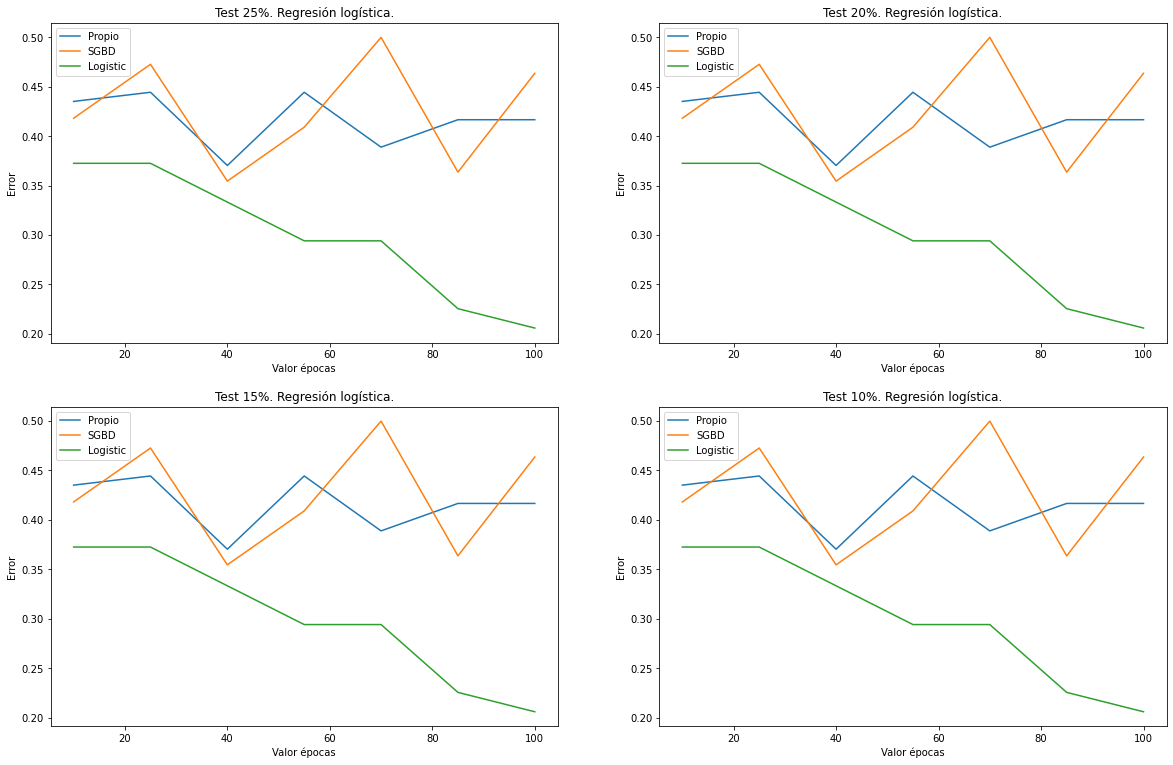

In [50]:
RL_step_1 = 15
RL_step_2 = 100
RL_step_aprendizaje = 5 # LUEGO SE DIVIDE ENTRE 10
RL_epoch_END_1 = 100
RL_epoch_END_2 = 100 + RL_step_2
RL_aprendizaje_END = 25 # LUEGO SE DIVIDE ENTRE 10

ranges_test = [epoch for epoch in range(10, RL_epoch_END_1, RL_step_1)]
for epoch in range(RL_step_2, RL_epoch_END_2, RL_step_2): ranges_test.append(epoch)

porcentajesTest = [25, 20, 15, 10]
kFoldsTest = [4, 6, 8, 10]
aprendizajes = [0.5, 1.0, 1.5, 2.0]

def plot_VS_all(datos, aprendizaje, vs_vc, labels):
    string = "%" if vs_vc else "K-Folds"
    plt.figure(figsize=(20,20))
    test_ranges = porcentajesTest if vs_vc else kFoldsTest
    for i, test_range in enumerate(test_ranges):
        plt.subplot(3, 2, i+1)
        for i, data in enumerate(datos):
            X, Y = ([], [])
            for epoch, values in data.items():
                X.append(epoch)
                if "ogistic" in labels[i]:
                    Y.append(values[i])
                else:
                    Y.append(values[aprendizaje][i])
            plt.plot(X, Y, label=labels[i])    

        plt.title(f"Test {test_range}{string}. Regresión logística.")
        plt.xlabel("Valor épocas")
        plt.ylabel("Error")
        plt.legend()

datos = (errorMedioPimaVS, errorMedioPimaVS_SGBD, errorMedioPimaVS_logistic)
labels = ["Propio", "SGBD", "Logistic"] 

plot_VS_all(datos, 0.5, True, labels)

In [51]:
errorMedioPimaVS

{10: {0.5: [0.4351851851851851,
   0.419047619047619,
   0.3854166666666667,
   0.42000000000000004],
  1.0: [0.3796296296296296,
   0.3904761904761904,
   0.4270833333333333,
   0.42000000000000004],
  1.5: [0.39814814814814814, 0.5523809523809524, 0.3333333333333333, 0.38],
  2.0: [0.4722222222222222, 0.48571428571428565, 0.4166666666666667, 0.4]},
 25: {0.5: [0.4444444444444444,
   0.4095238095238095,
   0.4375,
   0.4600000000000001],
  1.0: [0.4351851851851852, 0.5142857142857142, 0.3958333333333333, 0.41],
  1.5: [0.4722222222222222,
   0.4285714285714285,
   0.5104166666666666,
   0.41999999999999993],
  2.0: [0.42592592592592593, 0.3904761904761905, 0.4895833333333333, 0.48]},
 40: {0.5: [0.37037037037037035,
   0.41904761904761906,
   0.3020833333333333,
   0.41999999999999993],
  1.0: [0.40740740740740733,
   0.45714285714285713,
   0.4791666666666667,
   0.33999999999999997],
  1.5: [0.49074074074074076, 0.4666666666666666, 0.40625, 0.32999999999999996],
  2.0: [0.4814814814